# DS1001 Capstone

Spotipythons: Allison Redfern, Annabelle Huether, Mary Nwangwu, Isha Slavin

# Data Cleansing

In [1]:
#PreInstalled Imports
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import statistics as stat
import sys
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import linear_model
#Allison Imports
from statsmodels.stats.power import TTestIndPower
#Isha Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates
import seaborn 
import datetime as dt
import statsmodels.api as sm
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.style import set_palette
from sklearn import preprocessing
import plotly
import plotly.express as px
#Mary Imports
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA as sk_PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans as sk_KMeans
from sklearn.tree import _tree, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from dython.nominal import associations # must pip install dython to run
from IPython.display import display, HTML
import seaborn as sns
sns.set()
#Annabelle Imports
from dataclasses import dataclass                                  
from time import time              
%matplotlib inline            
import warnings                
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve
import requests
warnings.filterwarnings('ignore')

In [2]:
from numpy import random
random.seed(17669368) #Allison Redfern's N-number 

In [3]:
anime = pd.read_csv('NYU_IntroCapstone_ANIME - Sheet1.csv')
broadway = pd.read_csv('NYU_IntroCapstone_BROADWAY - Sheet1.csv')
classical = pd.read_csv('NYU_IntroCapstone_CLASSICAL - Sheet1.csv')
country = pd.read_csv('NYU_IntroCapstone_COUNTRY - Sheet1.csv')
dance_electronic = pd.read_csv('NYU_IntroCapstone_DANCE_ELECTRONIC - Sheet1.csv')
disney = pd.read_csv('NYU_IntroCapstone_DISNEY - Sheet1.csv')
happy_holidays = pd.read_csv('NYU_IntroCapstone_HAPPY_HOLIDAYS - Sheet1.csv')
hip_hop = pd.read_csv('NYU_IntroCapstone_HIP_HOP - Sheet1.csv')
jazz = pd.read_csv('NYU_IntroCapstone_JAZZ - Sheet1.csv')
latin = pd.read_csv('NYU_IntroCapstone_LATIN - Sheet1.csv')
pop = pd.read_csv('NYU_IntroCapstone_POP - Sheet1.csv')
rock = pd.read_csv('NYU_IntroCapstone_ROCK - Sheet1.csv')

data_df = pd.concat([anime, broadway, classical, country, dance_electronic, disney, happy_holidays, hip_hop, jazz, latin, pop, rock], axis=0)
data_df = data_df.drop_duplicates(subset=['Title', 'Artist'])
data_df = data_df.drop('#', axis = 1)
data_df = data_df.dropna(axis=0, how='any').reset_index(drop=True) #remove rows that have any NaN

#Convert Length Column from Minutes and Seconds to Seconds
#Function to Get Seconds
def get_sec(time_str):
    '''
    This function takes the time in a min:sec format and converts it to seconds
    '''
    time_str = str(time_str)
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

#Apply the get_sec Function to the Data (elif statements for improperly formatted data)
for i in range(14892):
    if i == 2979:
        data_df.iloc[i,8] = 1578
    elif i == 4928:
        data_df.iloc[i,8] = 1623
    elif i == 9846:
        data_df.iloc[i,8] = 1707
    elif i == 10249:
        data_df.iloc[i,8] = 2573
    elif i == 10386:
        data_df.iloc[i,8] = 1572
    elif i == 10404:
        data_df.iloc[i,8] = 1562
    elif i == 10714:
        data_df.iloc[i,8] = 1904
    else:
        data_df.iloc[i,8] = get_sec(data_df.iloc[i,8])
        
display(data_df)


,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,A.Sep,Rnd,Genre
0,KICK BACK,Kenshi Yonezu,2022-10-12,102.0,94.0,58.0,-5.0,29.0,193,0.0,88.0,24.0,4667.0,Anime
1,vendetta!,MUPP,2022-05-20,126.0,91.0,71.0,-4.0,67.0,107,18.0,83.0,111.0,4155.0,Anime
2,Limbo,Freddie Dredd,2022-08-11,75.0,62.0,80.0,-6.0,46.0,170,3.0,82.0,35.0,7509.0,Anime
3,Disaster,KSLV Noh,2021-06-21,117.0,61.0,82.0,-6.0,51.0,84,2.0,79.0,112.0,9349.0,Anime
4,This fffire - New Version,Franz Ferdinand,2004-11-15,146.0,89.0,44.0,-6.0,64.0,218,3.0,74.0,113.0,4368.0,Anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14887,Anti-glory,Horsegirl,2022-03-09,135.0,88.0,45.0,-7.0,43.0,211,2.0,36.0,758.0,6102.0,Rock
14888,I'm a Moth!!,LIA LIA,2022-02-09,165.0,86.0,60.0,-7.0,68.0,127,4.0,39.0,759.0,4727.0,Rock
14889,Boy,PÆRISH,2021-11-12,71.0,77.0,17.0,-5.0,9.0,202,0.0,25.0,760.0,3852.0,Rock
14890,Bullet Farm,Dead Pony,2022-03-24,83.0,89.0,54.0,-5.0,66.0,191,0.0,35.0,761.0,2261.0,Rock


# Inference

In [4]:
#Copy over data frame
inference_df = data_df

In [5]:
inference_df['Length'] = inference_df['Length'].astype(float)

In [6]:
# Create genre & attributes list: 
genres = inference_df.Genre.unique()
attributes = inference_df.columns.values.tolist()[3:11]

### Plots:

'Sample Sizes:'

,Genre,Title
0,Anime,629
1,Broadway,1101
2,Classical,1338
3,Country,1109
4,Dance/Electronic,1615
5,Disney,471
6,Happy Holidays,1161
7,Hip Hop,1447
8,Jazz,1966
9,Latin,2103


'Plots:'

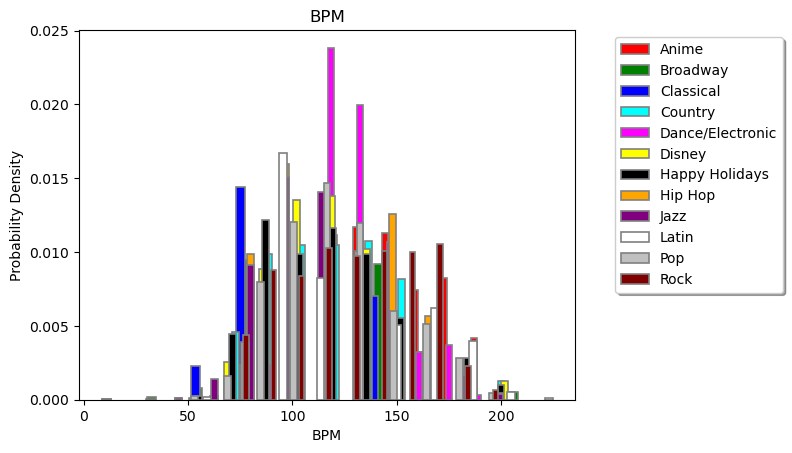

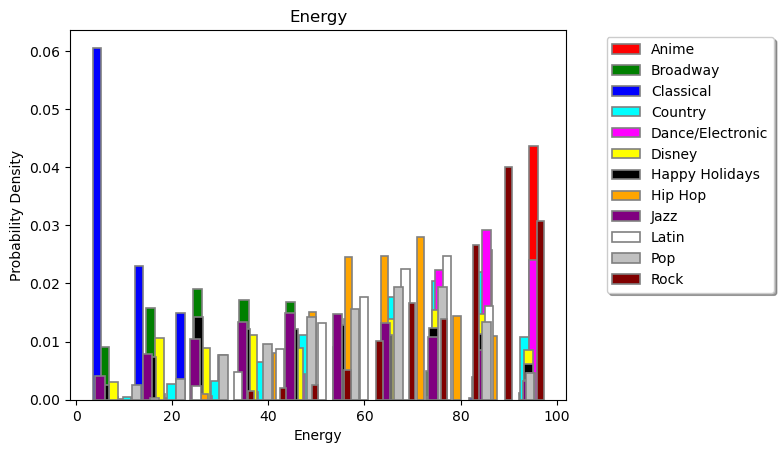

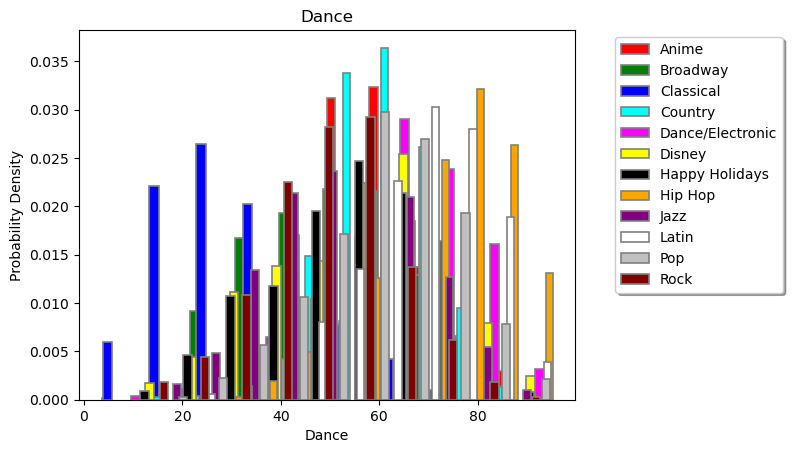

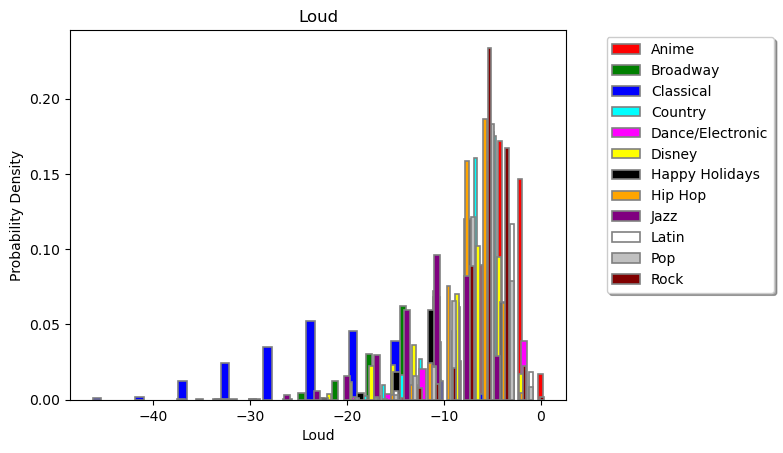

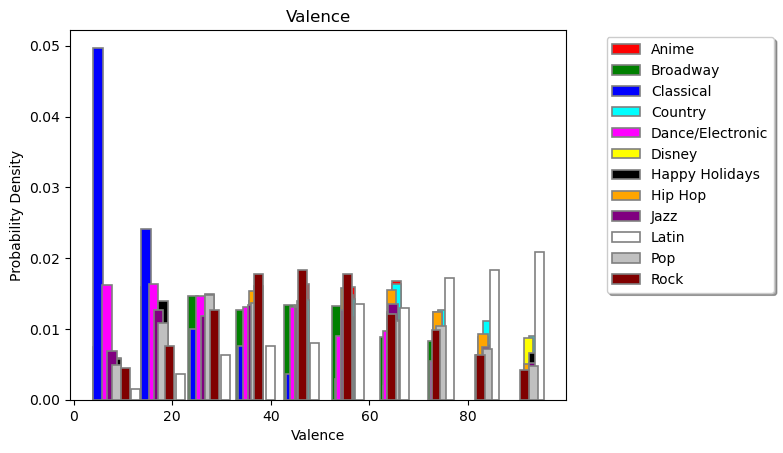

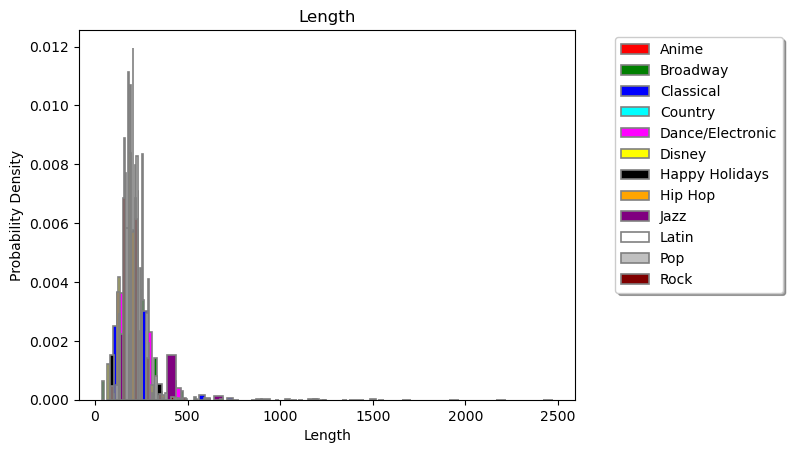

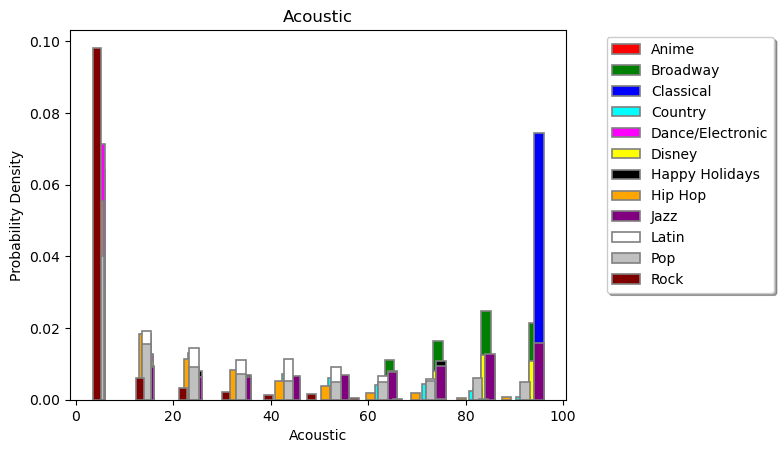

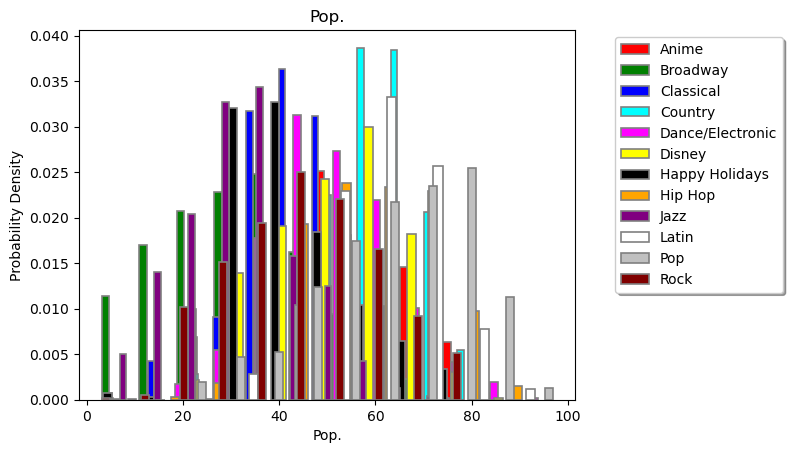

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


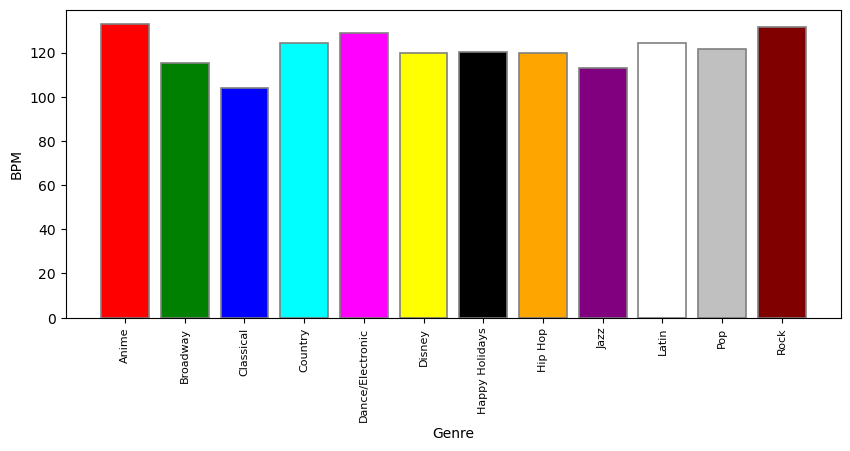

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


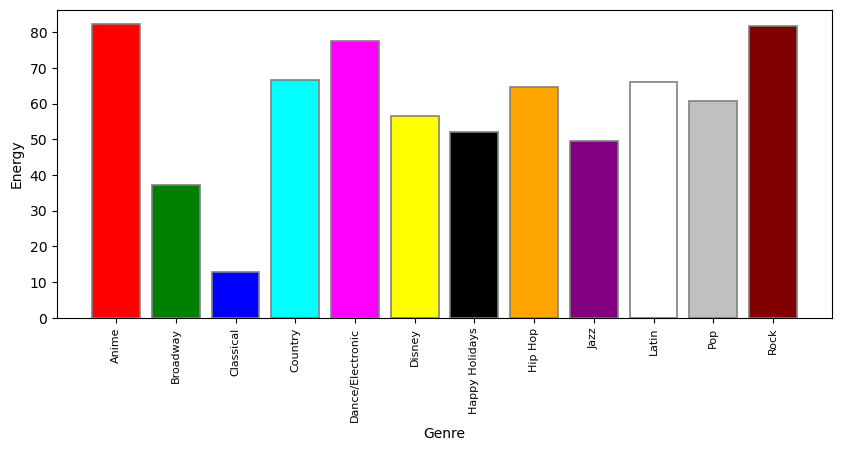

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


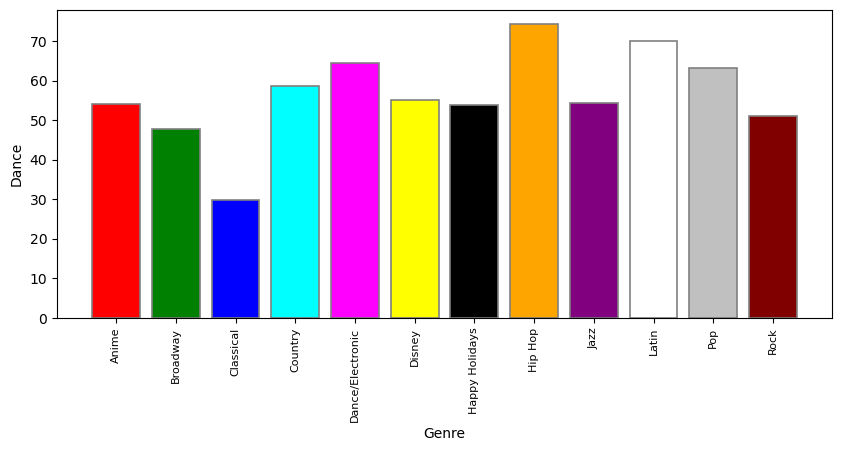

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


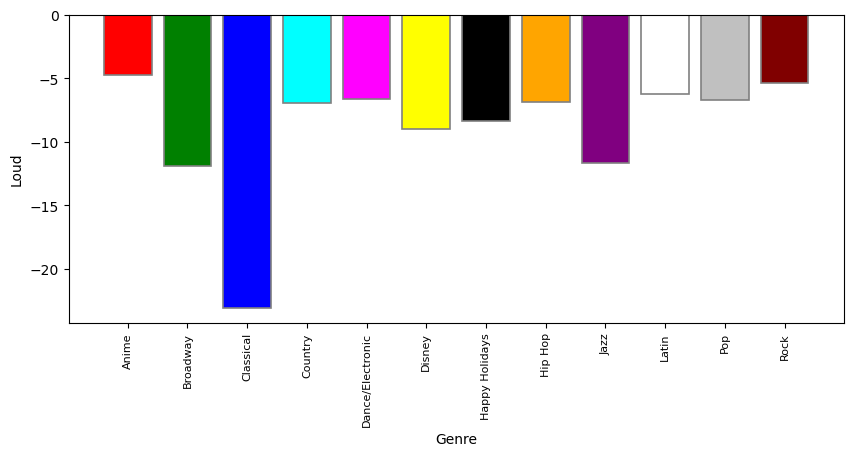

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


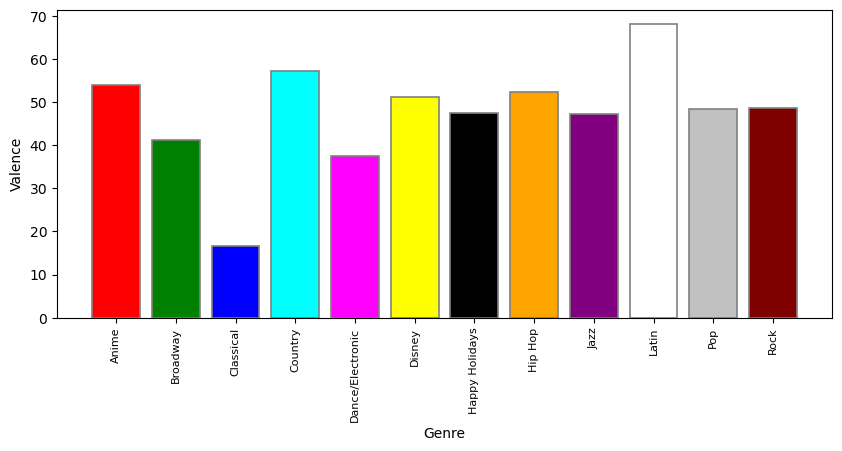

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


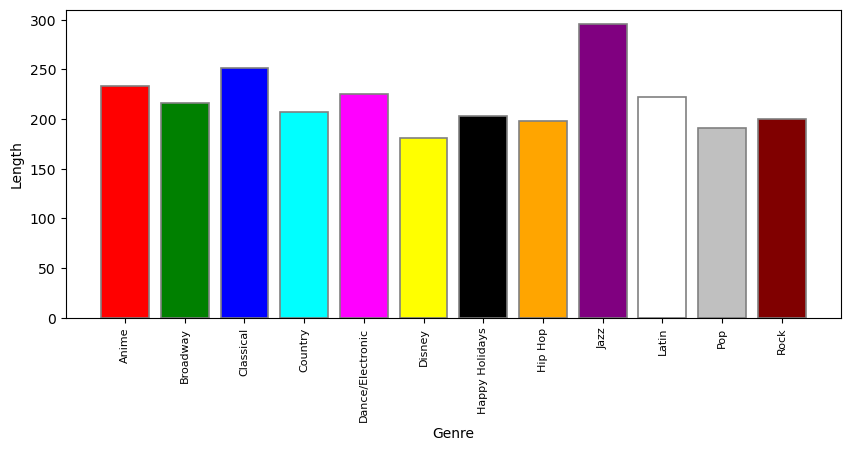

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


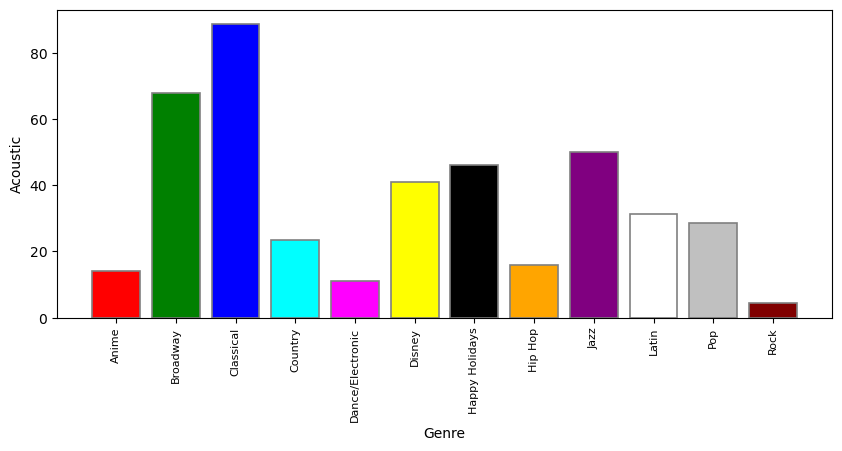

/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/3339979355.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)


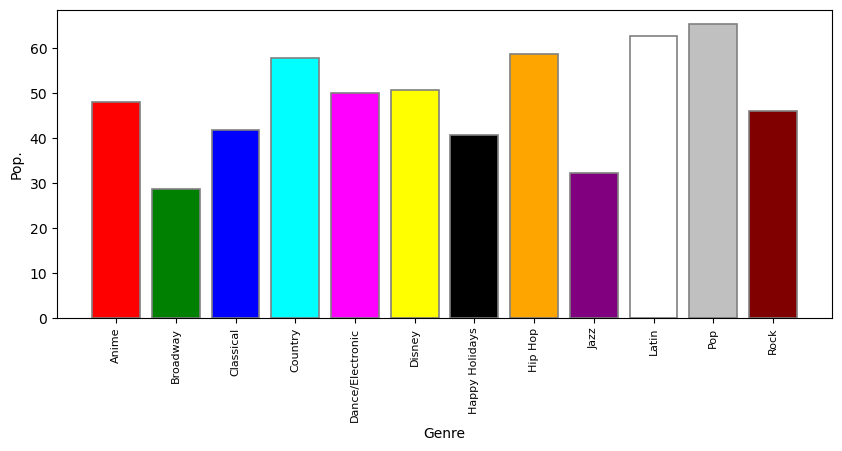

In [7]:
#Various Histograms to begin visualizing the difference between genres for certain attributes

color = ['red','green','blue','cyan','magenta','yellow','black','orange','purple','white','silver','maroon']

#sample size
display("Sample Sizes:")
display(inference_df.groupby(inference_df['Genre']).count().reset_index().iloc[:,0:2])

display("Plots:")
#each genre's attribute histogram
for attribute in attributes:
    for  i, genre in enumerate(genres):
        filtered_df = inference_df[(inference_df.Genre == genre)]
        plt.hist(filtered_df[attribute], rwidth = 0.2, color = color[i], edgecolor='gray', linewidth=1.2, label = genre, density = True)
        plt.ylabel("Probability Density")
        plt.xlabel(attribute)
        plt.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          fancybox=True, shadow=True, ncol=1)
        plt.title(attribute)
    plt.show()

#bar chart of average attribute per genre
for attribute in attributes: 
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_xticklabels(np.array(inference_df.loc[:,'Genre']), fontsize=8, rotation=90)
    X = inference_df.groupby(inference_df['Genre']).mean().reset_index()
    plt.bar(range(len(X)), X[attribute], color=color, edgecolor='gray', linewidth=1.2)
    plt.xticks(range(len(X)), X['Genre'])
    plt.ylabel(attribute)
    plt.xlabel('Genre')
    plt.show()

### Levene Test for Variance

In [8]:
#Check variance using Levene test - Results show variance is not the same across genres
for attribute in attributes:
    variance_test = stats.levene(inference_df[inference_df.Genre == genres[0]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[1]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[2]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[3]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[4]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[5]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[6]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[7]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[8]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[9]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[10]].loc[:,attribute],
                                inference_df[inference_df.Genre == genres[11]].loc[:,attribute])
    display(attribute,variance_test) #use this line to see that multiple p-values are lower than 0.005, therefore we cannot assume equal variance
         

'BPM'

LeveneResult(statistic=73.78627614541456, pvalue=2.0509264393573683e-162)

'Energy'

LeveneResult(statistic=139.7410292320194, pvalue=2.6794276899383328e-307)

'Dance'

LeveneResult(statistic=33.63395984550263, pvalue=1.2314278689730496e-71)

'Loud'

LeveneResult(statistic=298.0534875946027, pvalue=0.0)

'Valence'

LeveneResult(statistic=51.485973913529904, pvalue=3.566550514479814e-112)

'Length'

LeveneResult(statistic=143.40049318330617, pvalue=3.637257165e-315)

'Acoustic'

LeveneResult(statistic=321.9004886724703, pvalue=0.0)

'Pop.'

LeveneResult(statistic=42.33081597532627, pvalue=2.0857048055158614e-91)

### Welch's t-tests:

In [9]:
#Welch's t-test of all the combos of genres and features
used_genre_attribute_combos = np.empty(0)
genre1_list = np.empty(0)
genre2_list = np.empty(0)
attribute_list = np.empty(0)
result_list = np.empty(0)
stat_list = np.empty(0)
effect_size_list = np.empty(0)
power_list = np.empty(0)

alpha = 0.005 #significance level

for attribute in attributes:  
    for genre1 in genres: 
        for genre2 in genres:
            if (genre1 == genre2): #ignores comparing to itself 
                continue
            elif ((genre1 + genre2 + attribute) in used_genre_attribute_combos): #ignores duplicate pairs
                continue
            else:
                filtered_df1 = inference_df[(inference_df.Genre == genre1)]
                filtered_df2 = inference_df[(inference_df.Genre == genre2)]
                genre1_attribute_list = np.array(filtered_df1.loc[:,attribute])
                genre2_attribute_list = np.array(filtered_df2.loc[:,attribute])
                combined_genres_attribute_list = pd.concat([filtered_df1.loc[:,attribute], filtered_df2.loc[:,attribute]], axis=0) 
                
                #welch's t-test
                result = stats.ttest_ind(genre1_attribute_list, genre2_attribute_list, equal_var=False)
                
                #effect size
                effect_size = np.absolute((np.mean(genre1_attribute_list) - np.mean(genre2_attribute_list))/np.std(combined_genres_attribute_list))                      
                
                #power
                power_func = TTestIndPower()
                power = power_func.solve_power(effect_size=effect_size, nobs1=filtered_df1.shape[0], alpha=alpha, power=None, ratio=(filtered_df2.shape[0]/filtered_df1.shape[0]), alternative='two-sided')
                
                #lists of results
                genre1_list = np.append(genre1_list, genre1)
                genre2_list = np.append(genre2_list, genre2)
                attribute_list = np.append(attribute_list, attribute)
                result_list = np.append(result_list, result.pvalue)
                stat_list = np.append(stat_list, result.statistic)
                effect_size_list = np.append(effect_size_list, effect_size)   
                power_list = np.append(power_list,power)
                used_genre_attribute_combos = np.append(used_genre_attribute_combos,(genre2 + genre1 + attribute))
                
cols = {'Attribute': attribute_list, 'Genre 1': genre1_list, 'Genre 2': genre2_list,  'P-Value': result_list, 'Test Statistic': stat_list, 'Effect Size': effect_size_list, 'Power': power_list}

#create df of results:
welch_t_test_result_df = pd.DataFrame(data=cols).sort_values('P-Value').reset_index()



/var/folders/0y/9hd1909n7mbff5bv8h8d0d6m0000gn/T/ipykernel_7724/2567300450.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif ((genre1 + genre2 + attribute) in used_genre_attribute_combos): #ignores duplicate pairs


### Results of Welch's t-tests:

In [10]:
#Show df of results:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):                
    display("Results of Welch's T-Test:")
    display(welch_t_test_result_df.sort_values('Genre 1').sort_values('Attribute'))
    display(welch_t_test_result_df.shape)

"Results of Welch's T-Test:"

,index,Attribute,Genre 1,Genre 2,P-Value,Test Statistic,Effect Size,Power
177,407,Acoustic,Broadway,Classical,7.181e-94,-21.721,0.830,1.000
466,399,Acoustic,Anime,Dance/Electronic,3.421e-03,2.934,0.143,0.594
73,452,Acoustic,Hip Hop,Jazz,2.857e-260,-37.978,1.039,1.000
275,454,Acoustic,Hip Hop,Pop,1.487e-36,-12.905,0.515,1.000
228,434,Acoustic,Dance/Electronic,Disney,1.424e-56,-17.837,1.121,1.000
131,447,Acoustic,Happy Holidays,Hip Hop,2.483e-139,27.654,1.003,1.000
0,424,Acoustic,Classical,Pop,0.000e+00,60.176,1.560,1.000
136,430,Acoustic,Country,Jazz,1.665e-134,-26.007,0.812,1.000
326,427,Acoustic,Country,Disney,1.437e-22,-10.150,0.628,1.000
425,443,Acoustic,Disney,Jazz,5.648e-07,-5.050,0.263,0.990


(528, 8)

In [11]:
#Find Number of Significant Results, Significant/High Powered Results, & Significant/High Powered Results/High Effect Size Results

display("Out of 66 possible combinations:")

#Significant
significant_df = welch_t_test_result_df[welch_t_test_result_df['P-Value'] < alpha].reset_index()
significant_df = significant_df.rename(columns={"P-Value": "Results"})

results_by_genre = pd.pivot_table(significant_df, values='Results', columns=['Attribute'], aggfunc='count', fill_value='0')
results_by_genre = results_by_genre.loc[:,attributes]
display("With Significant Values (p-value < 0.005)")
display(results_by_genre)

#Significant and High Power
significant_df = welch_t_test_result_df[(welch_t_test_result_df['P-Value'] < alpha)
                                        & (welch_t_test_result_df['Power'] > 0.8)]
significant_df = significant_df.rename(columns={"P-Value": "Results"})

results_by_genre = pd.pivot_table(significant_df, values='Results', columns=['Attribute'], aggfunc='count', fill_value='0')
results_by_genre = results_by_genre.loc[:,attributes]
display("With Significant Values (p-value < 0.005) and High Power (1-Beta > 0.8)")
display(results_by_genre)

#Significant, High Power, and High Effect Size
significant_df = welch_t_test_result_df[(welch_t_test_result_df['P-Value'] < alpha) 
                                        & (welch_t_test_result_df['Power'] > 0.8)
                                        & (welch_t_test_result_df['Effect Size'] > 0.8)]
significant_df = significant_df.rename(columns={"P-Value": "Results"})

results_by_genre = pd.pivot_table(significant_df, values='Results', columns=['Attribute'], aggfunc='count', fill_value='0')
results_by_genre = results_by_genre.loc[:,attributes]
display("With Significant Values (p-value < 0.005), High Power (1-Beta > 0.8), and High Effect Size (Cohen's d > 0.8)")
display(results_by_genre)



'Out of 66 possible combinations:'

'With Significant Values (p-value < 0.005)'

Attribute,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.
Results,52,64,59,59,54,59,64,62


'With Significant Values (p-value < 0.005) and High Power (1-Beta > 0.8)'

Attribute,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.
Results,47,59,59,57,52,55,61,60


"With Significant Values (p-value < 0.005), High Power (1-Beta > 0.8), and High Effect Size (Cohen's d > 0.8)"

Attribute,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.
Results,3,37,29,31,17,2,36,35


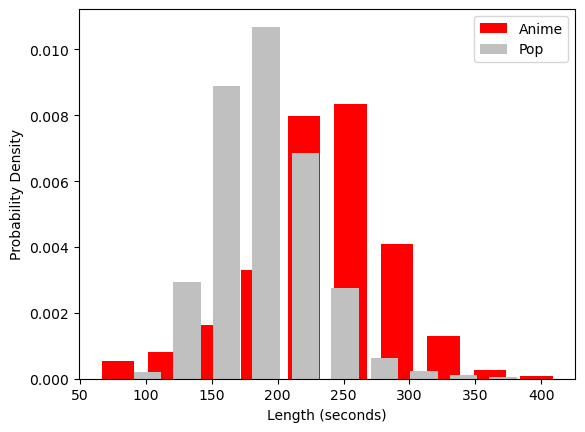

,index,Attribute,Genre 1,Genre 2,P-Value,Test Statistic,Effect Size,Power
215,339,Length,Anime,Pop,3.523615e-63,18.065518,0.892937,1.0
245,334,Length,Anime,Disney,2.279218e-47,15.307450,0.860660,1.0


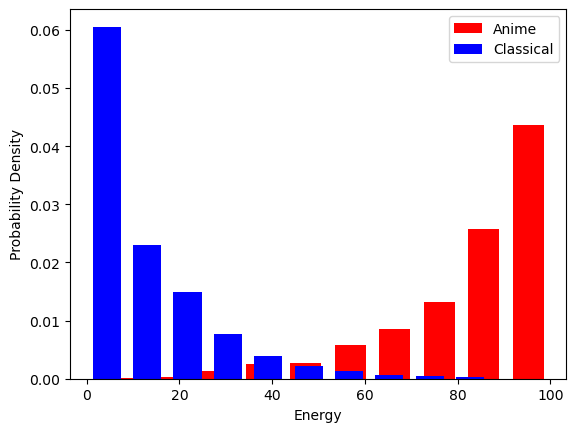

,index,Attribute,Genre 1,Genre 2,P-Value,Test Statistic,Effect Size,Power
1,94,Energy,Classical,Pop,0.000000e+00,-70.383260,1.646745,1.0
4,93,Energy,Classical,Latin,0.000000e+00,-102.087968,1.761821,1.0
7,92,Energy,Classical,Jazz,0.000000e+00,-57.055374,1.369222,1.0
13,95,Energy,Classical,Rock,0.000000e+00,-112.342831,1.913751,1.0
14,91,Energy,Classical,Hip Hop,0.000000e+00,-98.166332,1.762977,1.0
16,88,Energy,Classical,Dance/Electronic,0.000000e+00,-116.106602,1.814150,1.0
17,87,Energy,Classical,Country,0.000000e+00,-79.295653,1.717457,1.0
18,86,Energy,Broadway,Rock,0.000000e+00,-56.233592,1.563055,1.0
24,79,Energy,Broadway,Dance/Electronic,0.000000e+00,-53.913586,1.495396,1.0
26,67,Energy,Anime,Classical,0.000000e+00,90.653741,1.949822,1.0


In [12]:
#Plots for Highest Differences in Length and Energy

#Length
length_significant_df = welch_t_test_result_df[(welch_t_test_result_df['P-Value'] < alpha)
                                               & (welch_t_test_result_df['Power'] > 0.8)
                                               & (welch_t_test_result_df['Effect Size'] > 0.8)
                                               & (welch_t_test_result_df['Attribute'] == 'Length')]
plt.hist(inference_df['Length'][inference_df['Genre']=='Anime'], density = True, color ='red', bins = 10, rwidth = 0.7, label = "Anime")
plt.hist(inference_df['Length'][inference_df['Genre']=='Pop'], density = True, color = 'silver', bins = 10, rwidth = 0.7, label = "Pop")
plt.ylabel("Probability Density")
plt.xlabel('Length (seconds)')
plt.legend()
plt.show()
display(length_significant_df)

#Energy
energy_significant_df = welch_t_test_result_df[(welch_t_test_result_df['P-Value'] < alpha)
                                               & (welch_t_test_result_df['Power'] > 0.8)
                                               & (welch_t_test_result_df['Effect Size'] > 0.8)
                                               & (welch_t_test_result_df['Attribute'] == 'Energy')]
plt.hist(inference_df['Energy'][inference_df['Genre']=='Anime'], density = True, bins = 10, color ='red', rwidth = 0.7, label = "Anime")
plt.hist(inference_df['Energy'][inference_df['Genre']=='Classical'], density = True, color = 'blue', bins = 10,  rwidth = 0.7, label = "Classical")
plt.ylabel("Probability Density")
plt.xlabel('Energy')
plt.legend()
plt.show()
display(energy_significant_df)

In [13]:
#Find which genres have most differences from eachother:
#(The bottom left corner in the report is the top right portion transposed, for better audience readability)
genre_vs_genre_pivot = pd.pivot_table(significant_df, values='Results', index=['Genre 1'],
                    columns=['Genre 2'], aggfunc='count', fill_value='0')

display(genre_vs_genre_pivot)

Genre 2,Broadway,Classical,Country,Dance/Electronic,Disney,Happy Holidays,Hip Hop,Jazz,Latin,Pop,Rock
Genre 1,,,,,,,,,,,
Anime,4.0,6.0,1.0,0,4.0,3.0,3.0,4.0,3.0,3.0,0
Broadway,0,6.0,4.0,5.0,3.0,0,5.0,0,6.0,5.0,4.0
Classical,0,0,6.0,6.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0
Country,0,0,0,0,0,1.0,1.0,3.0,1.0,0,3.0
Dance/Electronic,0,0,0,0,2.0,2.0,0,4.0,3.0,2.0,1.0
Disney,0,0,0,0,0,0,2.0,1.0,3.0,1.0,3.0
Happy Holidays,0,0,0,0,0,0,3.0,0,3.0,1.0,3.0
Hip Hop,0,0,0,0,0,0,0,4.0,0,0,3.0
Jazz,0,0,0,0,0,0,0,0,4.0,2.0,4.0


# Prediction

# Classification

# Unsupervised Learning

Create DataFrames for Correlation Matrix, PCA, and K-Means

In [3]:
PCA_df = data_df        
PCA_df['Length'] = PCA_df['Length'].astype(float)


X = PCA_df.drop(['Title', 'Artist', 'Release', 'Rnd', 'A.Sep', 'Genre'], 1)
y = PCA_df['Genre']

# Check size of features and labels
print(X.shape)
print(y.shape)

(14892, 8)
(14892,)


Correlation Matrix

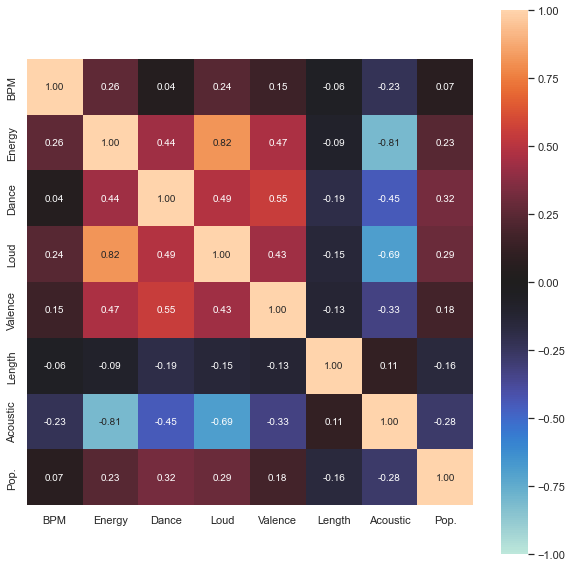

{'corr':                BPM    Energy     Dance      Loud   Valence    Length  \
 BPM       1.000000  0.260395  0.040975  0.235648  0.150497 -0.057052   
 Energy    0.260395  1.000000  0.435387  0.819132  0.468058 -0.090554   
 Dance     0.040975  0.435387  1.000000  0.487335  0.551251 -0.188712   
 Loud      0.235648  0.819132  0.487335  1.000000  0.429989 -0.146571   
 Valence   0.150497  0.468058  0.551251  0.429989  1.000000 -0.132629   
 Length   -0.057052 -0.090554 -0.188712 -0.146571 -0.132629  1.000000   
 Acoustic -0.229695 -0.807489 -0.452799 -0.691027 -0.334931  0.111094   
 Pop.      0.068022  0.234692  0.323474  0.294110  0.178428 -0.160555   
 
           Acoustic      Pop.  
 BPM      -0.229695  0.068022  
 Energy   -0.807489  0.234692  
 Dance    -0.452799  0.323474  
 Loud     -0.691027  0.294110  
 Valence  -0.334931  0.178428  
 Length    0.111094 -0.160555  
 Acoustic  1.000000 -0.276543  
 Pop.     -0.276543  1.000000  ,
 'ax': <AxesSubplot: >}

In [4]:
# features only
complete_correlation= associations(X, figsize=(10,10))
complete_correlation

PCA

In [5]:
# PCA Pipeline
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(X) #features only, no labels

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA())])

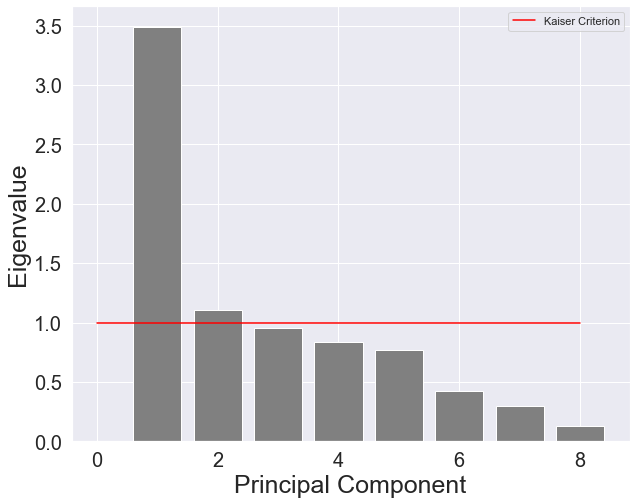

3.488337141222876
1.1064020321207158
0.953179365225836
0.8351293631342978
0.769773496851764
0.42366003326638046
0.29729134607568575
0.12676445935983952


In [6]:
# Kaiser Criterion: Consider all principal components with eigen values greater than 1.0
eigVals=pca_pipeline[1].explained_variance_
nComponents = 8
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='red',label='Kaiser Criterion') # red Kaiser criterion line
plt.xlabel('Principal Component', fontsize=25)
plt.ylabel('Eigenvalue', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()
plt.show()

# Print Eigenvalues
for index, value in enumerate(eigVals):
    print(value)

According to Kaiser Criterion we should consider 2 principal components, so the data after dimensionality reduction should be (14892, 2)

In [7]:
# Explained Variance Calculation
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 2 PCs above is: %.3f " % (sum(covarExplained[:2])))

Variance explained by the 2 PCs above is: 57.430 


Interpretation of PCA Output

In [8]:
# PCA Components
scaler = StandardScaler()
X_comp=scaler.fit_transform(X)

pca=sk_PCA(n_components=2)
X_new=pca.fit_transform(X_comp)

explained_variance=pca.explained_variance_ratio_
sum_variance = sum(explained_variance)
print("Variance explained by the 2 PCs above is: %.4f " % (sum_variance))

components=pca.components_
components=pd.DataFrame(components, columns=X.columns)
display(components)

Variance explained by the 2 PCs above is: 0.5743 


,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.
0,-0.171149,-0.473026,-0.374858,-0.464413,-0.346429,0.130481,0.445171,-0.235671
1,0.464498,0.259794,-0.354199,0.147307,-0.175525,0.571749,-0.210766,-0.409224


Energy & Loud (highly correlated), and Acoustic provide highest magnitude for PC1

Length, BPM, and Popularity provide highest magnitudes for PC2

Silhouette

In [9]:
# PCA Pipeline for Silhouette
music_pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA(n_components=2))])
music_processed = music_pca_pipeline.fit_transform(X.values)

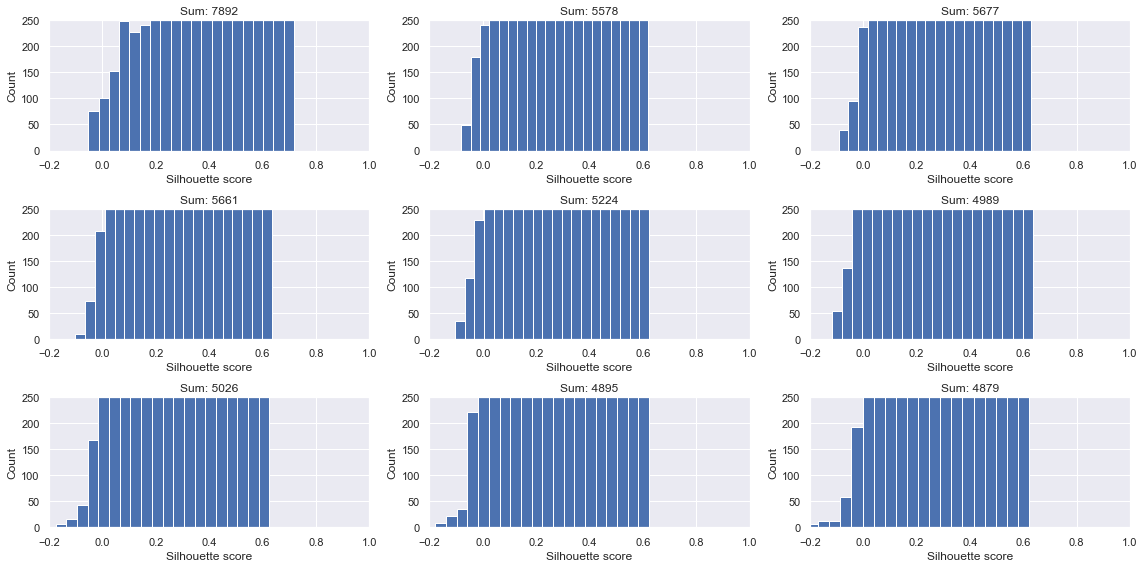

In [10]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(music_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(music_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

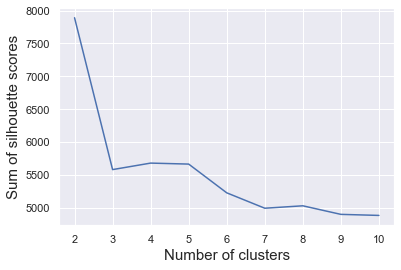

In [11]:
# Plot Silhouette Analysis
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of silhouette scores', fontsize=15)
plt.show()

k = 2, for k-means

In [12]:
# Define PCA
class PCA():
    """A method for doing dimensionality reduction by transforming the feature
    space to a lower dimensionality, removing correlation between features and
    maximizing the variance along each feature axis.
    """
    def _init__(self):
        self.eigenValues=None
        self.components=None
        
    def transform(self, X, n_components):
        """ Fit the dataset to the number of principal components specified in the
        constructor and return the transformed dataset """
        covariance_matrix = self.calculate_covariance_matrix(X)

        # Where (eigenvector[:,0] corresponds to eigenvalue[0])
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1] # [3, 2, 1] ---> [2, 1, 0] --> [0, 1, 2]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = np.atleast_1d(eigenvectors[:, idx])[:, :n_components]
        
        # Set the object variables
        self.eigenValues=eigenvalues
        self.components=eigenvectors

        # Project the data onto principal components
        X_transformed = X.dot(eigenvectors)

        return X_transformed
    
    def calculate_covariance_matrix(self, X, Y=None):
        """ Calculate the covariance matrix for the dataset X """
        if Y is None:
            Y = X
        n_samples = np.shape(X)[0]
        covariance_matrix = (1 / (n_samples-1)) * (X - X.mean(axis=0)).T.dot(Y - Y.mean(axis=0))

        return np.array(covariance_matrix, dtype=float)

In [13]:
# Labels
print("Genres: ", y.unique())
target_names = y.unique()

# Convert genres into unique ids
y_codes = pd.DataFrame(y)
y_codes['id'] = y_codes.groupby(['Genre']).ngroup()
y_codes_arr = np.array(y_codes['id'])
print(y_codes_arr)

Genres:  ['Anime' 'Broadway' 'Classical' 'Country' 'Dance/Electronic' 'Disney'
 'Happy Holidays' 'Hip Hop' 'Jazz' 'Latin' 'Pop' 'Rock']
[ 0  0  0 ... 11 11 11]


In [14]:
# PCA for visualization
pca=PCA()
X_transformed=pca.transform(StandardScaler().fit_transform(X), 2) # 2 principal components

range(0, 12)


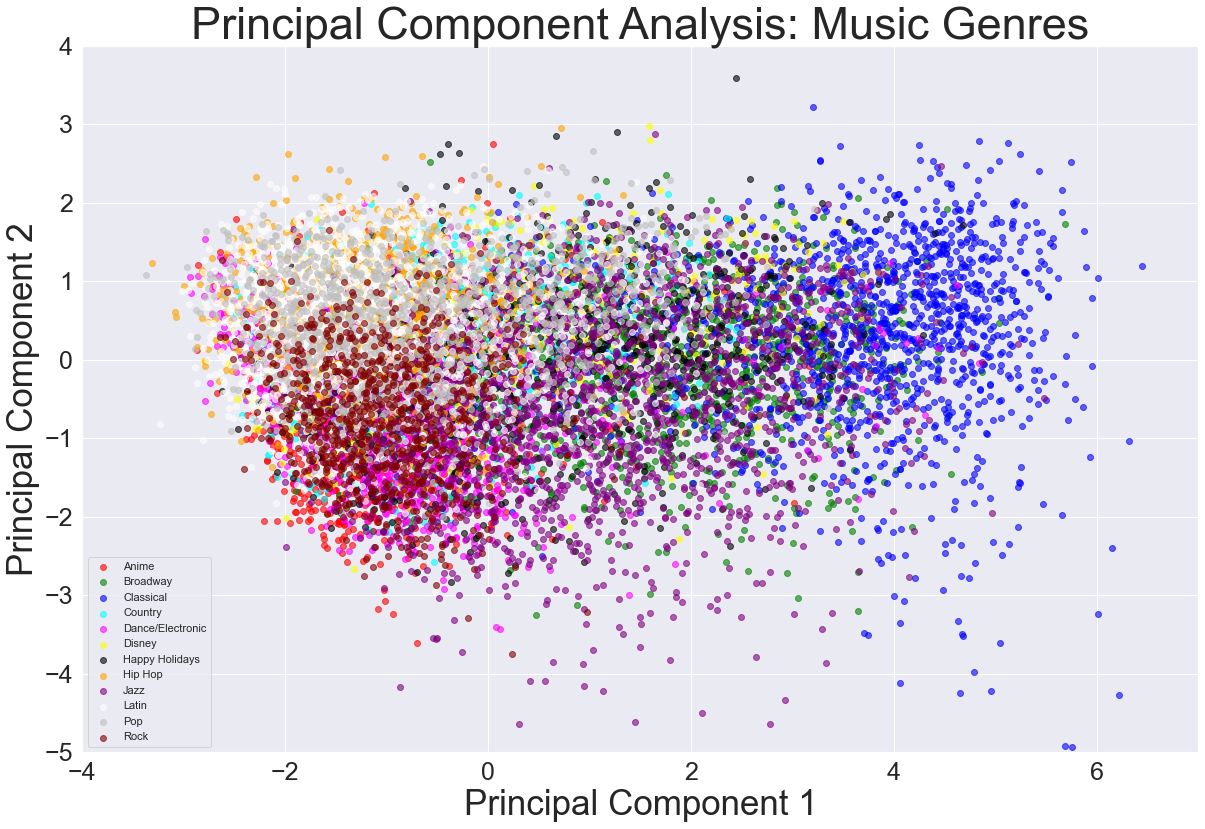

In [15]:
target_ids = range(len(target_names))
print(target_ids)
colors = ['red','green','blue','cyan','magenta','yellow','black','orange','purple','white','silver','maroon']
plt.figure(figsize=(20, 13))
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_transformed[y_codes_arr == i, 0], X_transformed[y_codes_arr == i, 1], c=c, alpha=0.6, label=label)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Principal Component Analysis: Music Genres', fontsize=45)
plt.xlabel('Principal Component 1', fontsize=35)
plt.ylabel('Principal Component 2', fontsize=35)
plt.ylim(-5,4)
plt.xlim(-4,7)
plt.legend()
plt.show()

K-Means Clustering

In [16]:
# K-Means
def KMeans(X, n_clusters, rseed=17669368):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(17669368)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

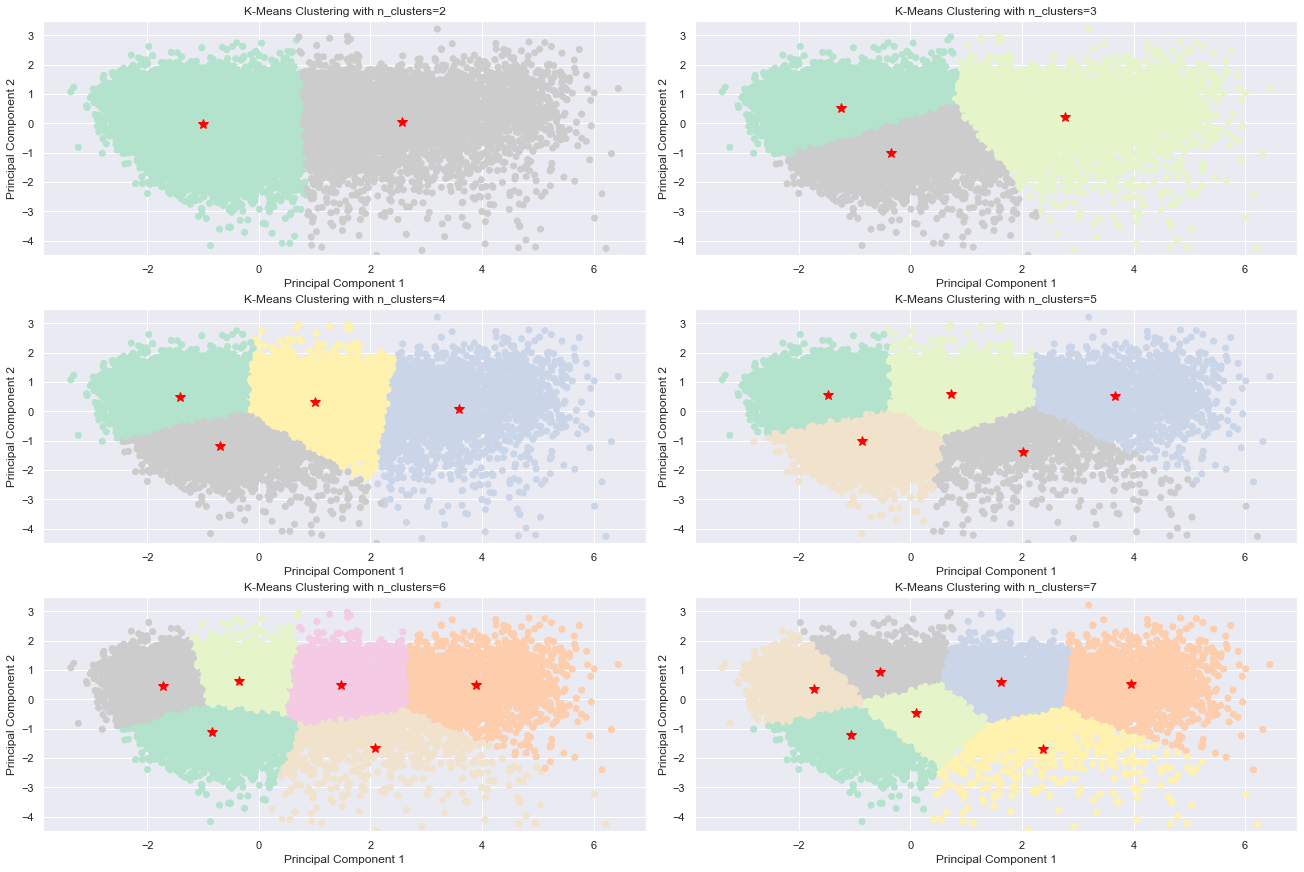

In [17]:
# Plotting K-Means clusters
n_clusters=range(2, 8)
plt.figure(figsize=(18, 12), layout="constrained")
for i, c_num in enumerate(n_clusters):
    centers, labels = KMeans(X_transformed, c_num)
    plt.subplot(3, 2, i+1)
    plt.title('K-Means Clustering with n_clusters={}'.format(c_num))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.ylim(-4.5,3.5)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Pastel2')
    plt.plot(centers[:, 0], centers[:, 1], '*',markersize=10,color='red')

k=2 from silhouette score

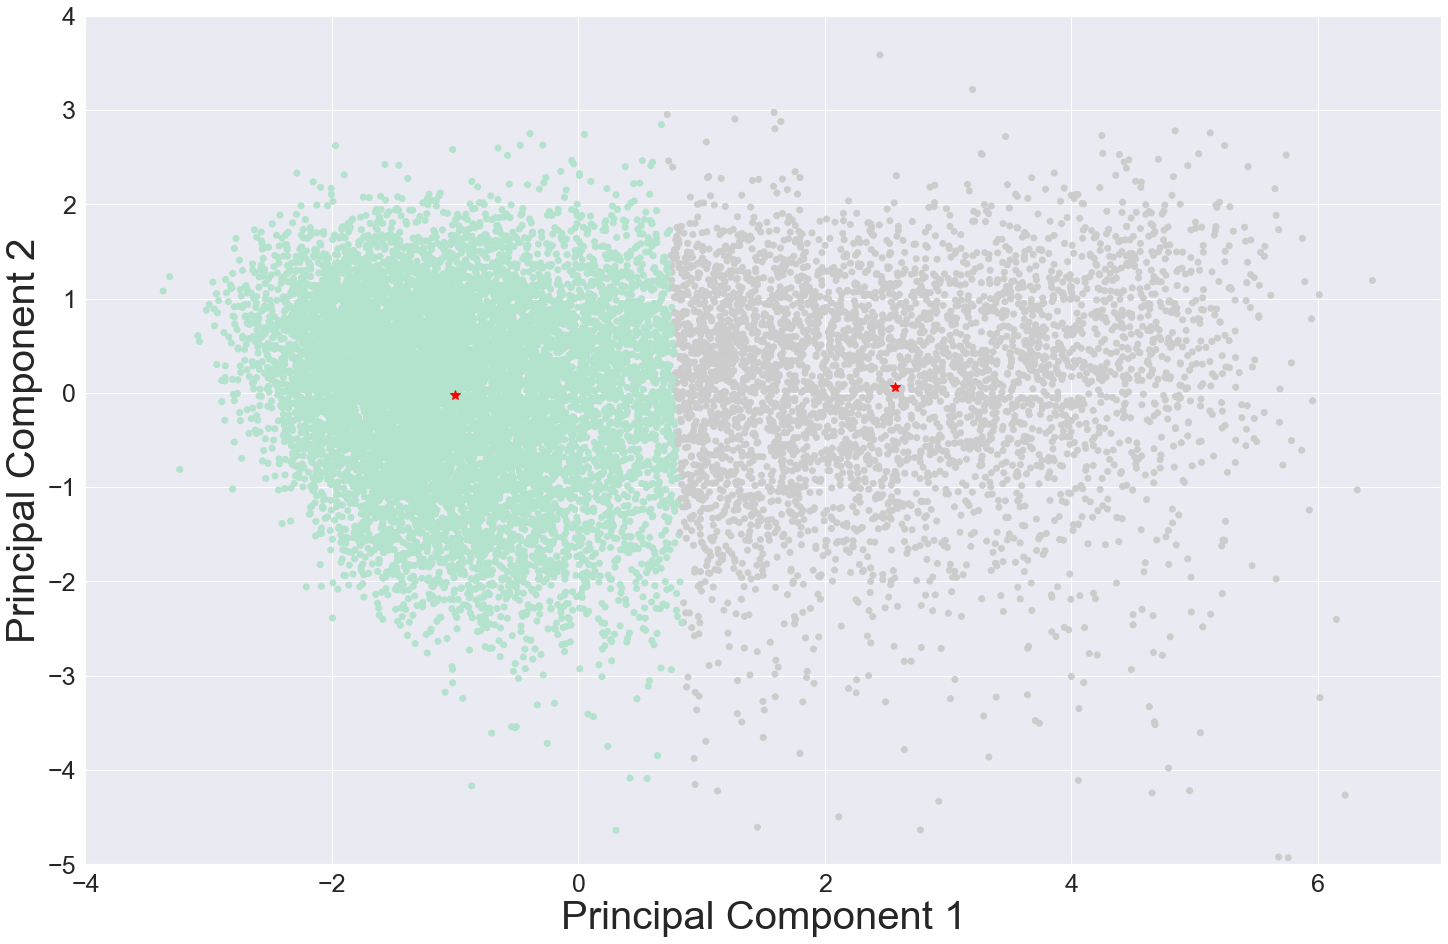

In [18]:
# Optimal Cluster # for K-Means
n_clusters=2
plt.figure(figsize=(20, 13), layout="constrained")
centers, labels = KMeans(X_transformed, 2)
# plt.title('K-Means Clustering with n_clusters={}'.format(2), fontsize=45)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Principal Component 1", fontsize=40)
plt.ylabel("Principal Component 2", fontsize=40)
plt.ylim(-5,4)
plt.xlim(-4,7)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=labels, cmap='Pastel2')
plt.plot(centers[:, 0], centers[:, 1], '*',markersize=10,color='red');

Cluster Report

In [19]:
# Cluster Report
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [20]:
pc = pca_pipeline.fit_transform(X)
kmeans_model = sk_KMeans(n_clusters=2)
y_cluster = kmeans_model.fit_predict(pc)

cluster_report(X, y_cluster, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
0,0,10680,[0.9349556307748604] (Energy > 41.5)
1,1,4212,[0.8838677101741984] (Energy <= 41.5)


# Supervised Learning

# Neural Network

Feedforward neural network using 3 layers, a sigmoid activation function and one hot encoder, along with gradient descent and backpropogation training.

### Build Network

In [431]:
#Define Functions Used in Neural Network
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z) * (1 - sigmoid(z))

def cost(output_activations, y):
    return 1/2*(np.sum((output_activations-y)**2))

def cost_derivative(output_activations, y):
    return (output_activations - y) 

In [432]:
#Create a Neural Network Class
@dataclass
class Network:
    num_layers: int
    biases: list
    weights: list

#Initialize Biases and Weights Randomly from Standard Normal Distribution
def init_network(layers):
    np.random.seed(17669368)
    return Network(
        len(layers),
        [np.random.randn(y, 1) for y in layers[1:]],
        [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])])

#Feedforward Function 
def feedforward(nn, a):
    for b, w in zip(nn.biases, nn.weights):
        a = sigmoid(np.dot(w, a) + b)
    return a

#Evaluate Performance on Validation and Test Data
def evaluate(nn, test_data):
    test_results = [(np.argmax(feedforward(nn, x)), y) for (x, y) in test_data]
    
    return sum(int(x == y) for (x, y) in test_results)

In [433]:
#Learning Process for the Neural Network
def learn(nn, training_data, epochs, mini_batch_size, learning_rate, test_data = None):
    n = len(training_data)

    for j in range(epochs):
        random.seed(17669368)
        random.shuffle(training_data)
        mini_batches = [training_data[k: k + mini_batch_size] for k in range(0, n, mini_batch_size)]
        cost=0.0
        for mini_batch in mini_batches:
            cost+=batch_stochastic_gradient_descent(nn, mini_batch, learning_rate)

        if test_data:
            print('Epoch {0}: accuracy {1}% , Cost: {2}'.format(f'{j + 1:2}', 100.0 * evaluate(nn, test_data) / len(test_data), np.round(cost/n, 3)))
        else:
            print('Epoch {0} complete, , Cost: {1}'.format(f'{j + 1:2}', np.round(cost/n, 3)))

In [434]:
#Stochastic Gradient Descent for the Batch
def batch_stochastic_gradient_descent(nn, mini_batch, eta):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]
    
    loss, nabla_b, nabla_w = batch_backprop(nn, mini_batch)
        
    nn.weights = [w - (eta / len(mini_batch)) * nw for w, nw in zip(nn.weights, nabla_w)]
    nn.biases  = [b - (eta / len(mini_batch)) * nb for b, nb in zip(nn.biases, nabla_b)]
    return loss

In [435]:
#Performs Backpropogation to Update Weights and Biases Based on Gradient Descent
def batch_backprop(nn, mini_batch):
    nabla_b = [np.zeros(b.shape) for b in nn.biases]
    nabla_w = [np.zeros(w.shape) for w in nn.weights]
    
    #Mini-batch Components
    ax, ay = tuple(t for t in np.asarray(mini_batch).transpose())
    x = np.stack(ax)
    y = np.stack(ay)  

    #Feedforward
    activation = x    
    activations = [x] 
    zs = []           

    for b, w in zip(nn.biases, nn.weights):
        z = np.matmul(w, activation) + b  
        zs.append(z)                     
        activation = sigmoid(z)         
        activations.append(activation)  
    
    loss = cost(activations[-1].squeeze(), y.squeeze())
    #Backward pass

    #Start from Output Layer
    delta = cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1]) 
    nabla_b[-1] = delta.sum(axis = 0)
    nabla_w[-1] = np.matmul(delta, activations[-2].transpose(0, 2, 1)).sum(axis = 0)
    
    #Back to Input Layer
    for i in reversed(range(2, nn.num_layers)):
        z = zs[-i]
        sp = sigmoid_prime(z)
        delta = np.matmul(nn.weights[-i + 1].transpose(), delta) * sp
        nabla_b[-i] = delta.sum(axis = 0)
        nabla_w[-i] = np.matmul(delta, activations[-i - 1].transpose(0, 2, 1)).sum(axis = 0)
        
    return (loss, nabla_b, nabla_w)

In [436]:
#Make a Copy of Original Dataset for Subsection
neural_df = data_df[['BPM','Energy','Dance','Loud','Valence','Length','Acoustic','Pop.','Genre']]


In [437]:
#Turn the Genre Lables Into Digits 0-11
label_data = LabelEncoder()
neural_df['Genre'] = label_data.fit_transform(neural_df['Genre'])
display(neural_df)

,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,Genre
0,102.0,94.0,58.0,-5.0,29.0,193,0.0,88.0,0
1,126.0,91.0,71.0,-4.0,67.0,107,18.0,83.0,0
2,75.0,62.0,80.0,-6.0,46.0,170,3.0,82.0,0
3,117.0,61.0,82.0,-6.0,51.0,84,2.0,79.0,0
4,146.0,89.0,44.0,-6.0,64.0,218,3.0,74.0,0
...,...,...,...,...,...,...,...,...,...
14887,135.0,88.0,45.0,-7.0,43.0,211,2.0,36.0,11
14888,165.0,86.0,60.0,-7.0,68.0,127,4.0,39.0,11
14889,71.0,77.0,17.0,-5.0,9.0,202,0.0,25.0,11
14890,83.0,89.0,54.0,-5.0,66.0,191,0.0,35.0,11


Labels:

Anime = 0

Broadway = 1

Classical = 2

Country = 3

Dance Electronic = 4

Disney = 5

Happy Holidays = 6

Hip Hop = 7

Jazz = 8

Latin = 9

Pop = 10

Rock = 11

### Run All Data Through the Neural Network

In [438]:
#Load and Transform Data
neural_data = neural_df.copy()
Y = neural_data['Genre'].tolist()
neural_data = neural_data.drop(['Genre'], axis=1)
X = neural_data.to_numpy() 
y = np.array(Y) 

#80/10/10 Train/Validate/Test Split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=17669368)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=17669368)

#Format Data
train = (X_train.astype(float),y_train)
validate = (X_valid.astype(float),y_valid)
test = (X_test.astype(float),y_test)


In [439]:
#Define Data Wrapper, One Hot Encoder, and Print Shape for Output
def load_data_wrapper():
    tr_d = train
    va_d = validate
    te_d = test
    
    training_inputs = [np.reshape(x, (8, 1)) for x in tr_d[0]]
    training_results = [one_hot_encode(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (8, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (8, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    
    return (list(training_data), list(validation_data), list(test_data))

def one_hot_encode(j):
    e = np.zeros((12, 1))
    e[j] = 1.0
    
    return e

def print_shape(name, data):
    print('Shape of {0}: {1}'.format(name, data.shape))

In [440]:
#Train and Test Neural Network
#8 Inputs, 10 Neurons in Hidden Layer, 12 Labels
training_data, validation_data, test_data = load_data_wrapper()
nn = init_network([8, 10, 12])

for l in range(0, nn.num_layers - 1):
    print('\nNetwork layer {0}'.format(l + 2))
    print_shape('weights', nn.weights[l])
    print_shape('biases', nn.biases[l])
    
#Hyper Parameters
epochs = 30
mini_batch_size = 10
learning_rate = 3.0
    
#Learning Process
print('\nLearning process started...\n')
time_start = time()
learn(nn, training_data, epochs, mini_batch_size, learning_rate, validation_data)
time_end = time()
time_elapsed = time_end - time_start
print('\nLearning process complete in {0} seconds ({1} seconds per epoch)!\n'.format(f'{time_elapsed:.0f}', f'{time_elapsed / epochs:.1f}'))

#Use Held Out Test Data to Determine Accuracy
print('Validation (with yet unseen data): accuracy {0}%'.format(100.0 * evaluate(nn, test_data) / len(test_data)))


Network layer 2
Shape of weights: (10, 8)
Shape of biases: (10, 1)

Network layer 3
Shape of weights: (12, 10)
Shape of biases: (12, 1)

Learning process started...

Epoch  1: accuracy 13.163196776359973% , Cost: 0.458
Epoch  2: accuracy 13.096037609133647% , Cost: 0.454
Epoch  3: accuracy 12.49160510409671% , Cost: 0.454
Epoch  4: accuracy 13.096037609133647% , Cost: 0.454
Epoch  5: accuracy 12.49160510409671% , Cost: 0.454
Epoch  6: accuracy 13.096037609133647% , Cost: 0.454
Epoch  7: accuracy 10.543989254533244% , Cost: 0.454
Epoch  8: accuracy 10.476830087306917% , Cost: 0.454
Epoch  9: accuracy 13.096037609133647% , Cost: 0.454
Epoch 10: accuracy 12.49160510409671% , Cost: 0.454
Epoch 11: accuracy 10.543989254533244% , Cost: 0.454
Epoch 12: accuracy 13.096037609133647% , Cost: 0.454
Epoch 13: accuracy 12.49160510409671% , Cost: 0.454
Epoch 14: accuracy 12.49160510409671% , Cost: 0.454
Epoch 15: accuracy 12.49160510409671% , Cost: 0.454
Epoch 16: accuracy 10.543989254533244% , Cos

This model is not so good at making predictions (this is basically guessing) - standardization will improve the learning and accuracy of the network.

### Run Standardized Data Through the Neural Network

In [441]:
#Load and Transform Data
neural_data = neural_df.copy()
Y = neural_data['Genre'].tolist()
neural_data = neural_data.drop(['Genre'], axis=1)
X = neural_data.to_numpy() 
y = np.array(Y) 

#80/10/10 Train/Validate/Test Split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=17669368)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=17669368)

#Standardize Data (Fitting the scaler to the training data and then transforming the training and test data with it)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#Format Data as Tuples
train = (X_train.astype(float),y_train)
validate = (X_valid.astype(float),y_valid)
test = (X_test.astype(float),y_test)


In [442]:
#Redefine Data Wrapper and One Hot Encoder
def load_data_wrapper():
    tr_d = train
    va_d = validate
    te_d = test
    
    training_inputs = [np.reshape(x, (8, 1)) for x in tr_d[0]]
    training_results = [one_hot_encode(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (8, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (8, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    
    return (list(training_data), list(validation_data), list(test_data))

def one_hot_encode(j):
    e = np.zeros((12, 1))
    e[j] = 1.0
    
    return e

In [443]:
#Train and Test Neural Network
#8 Inputs, 10 in Hidden Layer, 12 Labels
training_data, validation_data, test_data = load_data_wrapper()
nn = init_network([8, 10, 12])

for l in range(0, nn.num_layers - 1):
    print('\nNetwork layer {0}'.format(l + 2))
    print_shape('weights', nn.weights[l])
    print_shape('biases', nn.biases[l])
    
#Hyper Parameters
epochs = 30
mini_batch_size = 10
learning_rate = 3.0
    
#Learning Process
print('\nLearning process started...\n')
time_start = time()
learn(nn, training_data, epochs, mini_batch_size, learning_rate, validation_data)
time_end = time()
time_elapsed = time_end - time_start
print('\nLearning process complete in {0} seconds ({1} seconds per epoch)!\n'.format(f'{time_elapsed:.0f}', f'{time_elapsed / epochs:.1f}'))

#Use Held Out Test Data to Determine Accuracy
print('Validation (with yet unseen data): accuracy {0}%'.format(100.0 * evaluate(nn, test_data) / len(test_data)))


Network layer 2
Shape of weights: (10, 8)
Shape of biases: (10, 1)

Network layer 3
Shape of weights: (12, 10)
Shape of biases: (12, 1)

Learning process started...

Epoch  1: accuracy 42.51175285426461% , Cost: 0.365
Epoch  2: accuracy 44.45936870382807% , Cost: 0.339
Epoch  3: accuracy 45.66823371390195% , Cost: 0.335
Epoch  4: accuracy 44.79516453995971% , Cost: 0.333
Epoch  5: accuracy 44.99664204163869% , Cost: 0.333
Epoch  6: accuracy 45.06380120886501% , Cost: 0.331
Epoch  7: accuracy 45.86971121558093% , Cost: 0.33
Epoch  8: accuracy 46.94425789120215% , Cost: 0.329
Epoch  9: accuracy 48.22028206850235% , Cost: 0.328
Epoch 10: accuracy 46.54130288784419% , Cost: 0.327
Epoch 11: accuracy 47.81732706514439% , Cost: 0.327
Epoch 12: accuracy 47.48153122901276% , Cost: 0.327
Epoch 13: accuracy 47.81732706514439% , Cost: 0.327
Epoch 14: accuracy 46.60846205507052% , Cost: 0.326
Epoch 15: accuracy 48.69039623908664% , Cost: 0.326
Epoch 16: accuracy 47.41437206178643% , Cost: 0.325
Ep

The accuracy is largely improved using standardization (more than doubled in acccuracy!), but it is still far from good. Perform one-vs-all ROC analysis.

### One-vs-All ROC Analysis 

Genre or Not Binary Classification

In [444]:
#Determine the Number of Samples for Each Genre 
neural_df2 = neural_df.copy()
genre_0 = neural_df2[neural_df2['Genre']==0]
genre_1 = neural_df2[neural_df2['Genre']==1]
genre_2 = neural_df2[neural_df2['Genre']==2]
genre_3 = neural_df2[neural_df2['Genre']==3]
genre_4 = neural_df2[neural_df2['Genre']==4]
genre_5 = neural_df2[neural_df2['Genre']==5]
genre_6 = neural_df2[neural_df2['Genre']==6]
genre_7 = neural_df2[neural_df2['Genre']==7]
genre_8 = neural_df2[neural_df2['Genre']==8]
genre_9 = neural_df2[neural_df2['Genre']==9]
genre_10 = neural_df2[neural_df2['Genre']==10]
genre_11 = neural_df2[neural_df2['Genre']==11]

In [445]:
#Initialize List of the Number of Samples for Each Genre
samples = [629,1101,1338,1109,1615,471,1161,1447,1966,2103,1163,789]
#Initialize List of the Genres
genres = [0,1,2,3,4,5,6,7,8,9,10,11]
#Initialize List of Lists of the Genres Not Being Singled Out
rest = [[1,2,3,4,5,6,7,8,9,10,11],[0,2,3,4,5,6,7,8,9,10,11],[0,1,3,4,5,6,7,8,9,10,11],[0,1,2,4,5,6,7,8,9,10,11],[0,1,2,3,5,6,7,8,9,10,11],[0,1,2,3,4,6,7,8,9,10,11],[0,1,2,3,4,5,7,8,9,10,11],[0,1,2,3,4,5,6,8,9,10,11],[0,1,2,3,4,5,6,7,9,10,11],[0,1,2,3,4,5,6,7,8,10,11],[0,1,2,3,4,5,6,7,8,9,11],[0,1,2,3,4,5,6,7,8,9,10]]


In [446]:
#Change Data Wrapper and Change One Hot Encoder to 2 Outputs
def load_data_wrapper(train,test,validate):
    tr_d = train
    va_d = validate
    te_d = test
    
    training_inputs = [np.reshape(x, (8, 1)) for x in tr_d[0]]
    training_results = [one_hot_encode(y) for y in tr_d[1]]
    training_data = zip(training_inputs, training_results)
    validation_inputs = [np.reshape(x, (8, 1)) for x in va_d[0]]
    validation_data = zip(validation_inputs, va_d[1])
    test_inputs = [np.reshape(x, (8, 1)) for x in te_d[0]]
    test_data = zip(test_inputs, te_d[1])
    
    return (list(training_data), list(validation_data), list(test_data))

def one_hot_encode(j):
    e = np.zeros((2, 1))
    e[j] = 1.0
    
    return e

In [447]:
#Data Preprocessing Function
def binary_classifier(genrenumber,restofgenres,numsamples):
    '''
    This function takes the coded genre number, a list of the rest of the genre numbers and the number 
    of samples in the dataset for that particular genre. It tranforms the data for a genre in 
    a one-vs-all binary format for use in the neural network.
    Params:
    genrenumber: (int)
    restofgenres: (list)
    numsamples: (int)
    Return:
    train: (tuple)
    test: (tuple)
    validate: (tuple)
    '''
    #Replace Labels with 0s and 1s
    neural_df2 = neural_df.copy()
    neural_df2 = neural_df2.replace({'Genre': genrenumber}, 20)
    neural_df2 = neural_df2.replace({'Genre': restofgenres}, 0)
    neural_df2 = neural_df2.replace({'Genre': 20}, 1)
    dataframe1 = neural_df2[neural_df2['Genre']==1]
    dataframe1 = pd.DataFrame(dataframe1)
    dataframe2 = neural_df2[neural_df2['Genre']==0]
    dataframe2 = pd.DataFrame(dataframe2)
    dataframe2 = dataframe2.sample(n=numsamples, replace=False, random_state=17669368)
    df_stacked = pd.concat([dataframe1, dataframe2])
    
    #Load and Transform Data
    Y = df_stacked['Genre'].tolist()
    df_stacked = df_stacked.drop(['Genre'], axis=1)
    X = df_stacked.to_numpy()
    y = np.array(Y)

    #80/10/10 Train/Validate/Test Split
    X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=17669368)
    X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=17669368)
    
    #Standardize Data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    X_valid = scaler.transform(X_valid)
    
    #Format Data
    train = (X_train.astype(float),y_train)
    validate = (X_valid.astype(float),y_valid)
    test = (X_test.astype(float),y_test)
    
    return train, test, validate



Genre: 0

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 79.36507936507937% , Cost: 0.188
Epoch  2: accuracy 77.77777777777777% , Cost: 0.172
Epoch  3: accuracy 81.74603174603175% , Cost: 0.169
Epoch  4: accuracy 80.95238095238095% , Cost: 0.164
Epoch  5: accuracy 77.77777777777777% , Cost: 0.164
Epoch  6: accuracy 81.74603174603175% , Cost: 0.161
Epoch  7: accuracy 80.95238095238095% , Cost: 0.158
Epoch  8: accuracy 81.74603174603175% , Cost: 0.154
Epoch  9: accuracy 81.74603174603175% , Cost: 0.152
Epoch 10: accuracy 81.74603174603175% , Cost: 0.149
Epoch 11: accuracy 81.74603174603175% , Cost: 0.146
Epoch 12: accuracy 83.33333333333333% , Cost: 0.147
Epoch 13: accuracy 81.74603174603175% , Cost: 0.145
Epoch 14: accuracy 81.74603174603175% , Cost: 0.144
Epoch 15: accuracy 80.95238095238095% , Cost: 0.143
Epoch 16: accuracy 82.53968253968254% , Cost: 0.

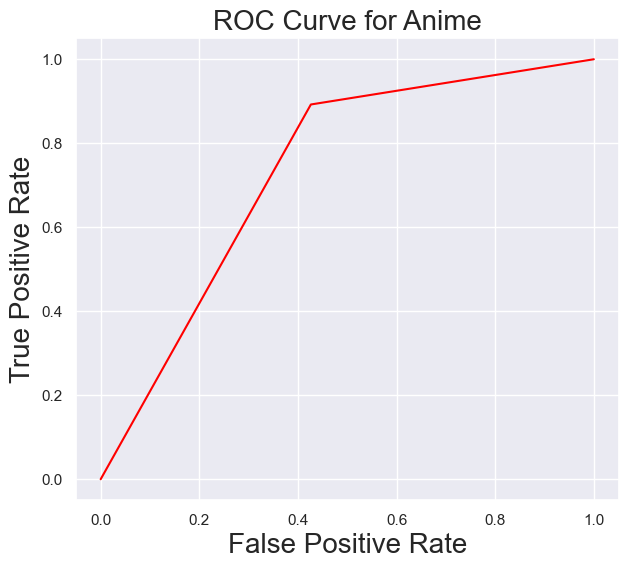

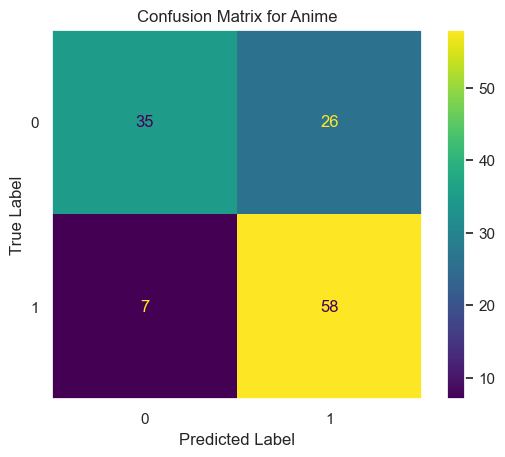

Accuracy of the model is: 0.738
AUC: 0.7330390920554855

Genre: 1

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 82.72727272727273% , Cost: 0.158
Epoch  2: accuracy 80.45454545454545% , Cost: 0.137
Epoch  3: accuracy 84.54545454545455% , Cost: 0.134
Epoch  4: accuracy 80.45454545454545% , Cost: 0.133
Epoch  5: accuracy 80.45454545454545% , Cost: 0.129
Epoch  6: accuracy 79.54545454545455% , Cost: 0.128
Epoch  7: accuracy 83.18181818181819% , Cost: 0.128
Epoch  8: accuracy 75.0% , Cost: 0.125
Epoch  9: accuracy 80.0% , Cost: 0.126
Epoch 10: accuracy 79.54545454545455% , Cost: 0.122
Epoch 11: accuracy 82.27272727272727% , Cost: 0.123
Epoch 12: accuracy 84.0909090909091% , Cost: 0.119
Epoch 13: accuracy 85.0% , Cost: 0.121
Epoch 14: accuracy 77.72727272727273% , Cost: 0.121
Epoch 15: accuracy 73.18181818181819% , Cost: 0.118
Epoch 16: accuracy 80.4545454545

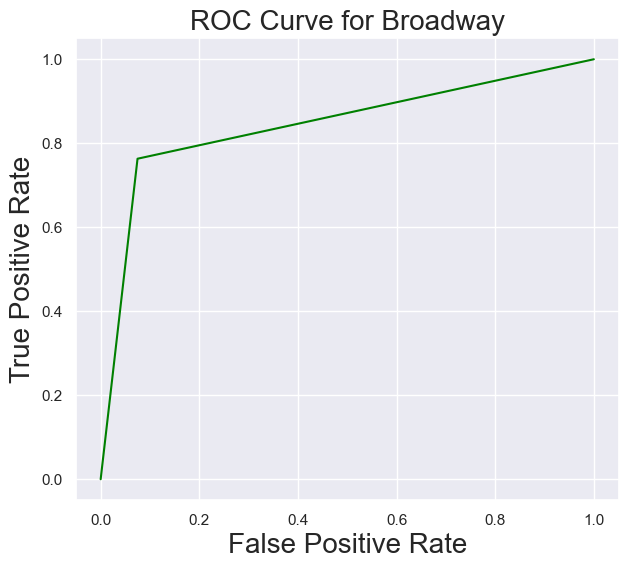

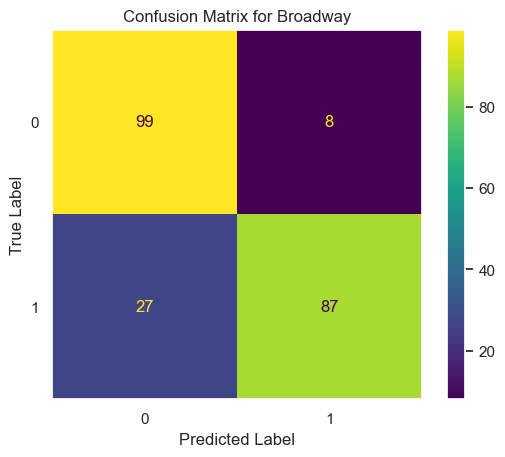

Accuracy of the model is: 0.842
AUC: 0.8441957697983276

Genre: 2

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 91.7910447761194% , Cost: 0.076
Epoch  2: accuracy 92.53731343283582% , Cost: 0.06
Epoch  3: accuracy 92.53731343283582% , Cost: 0.058
Epoch  4: accuracy 90.67164179104478% , Cost: 0.057
Epoch  5: accuracy 92.16417910447761% , Cost: 0.056
Epoch  6: accuracy 92.91044776119404% , Cost: 0.054
Epoch  7: accuracy 92.16417910447761% , Cost: 0.054
Epoch  8: accuracy 93.28358208955224% , Cost: 0.051
Epoch  9: accuracy 92.91044776119404% , Cost: 0.05
Epoch 10: accuracy 93.28358208955224% , Cost: 0.05
Epoch 11: accuracy 92.16417910447761% , Cost: 0.049
Epoch 12: accuracy 92.91044776119404% , Cost: 0.048
Epoch 13: accuracy 92.91044776119404% , Cost: 0.049
Epoch 14: accuracy 92.91044776119404% , Cost: 0.048
Epoch 15: accuracy 93.28358208955224% , Cost: 0.

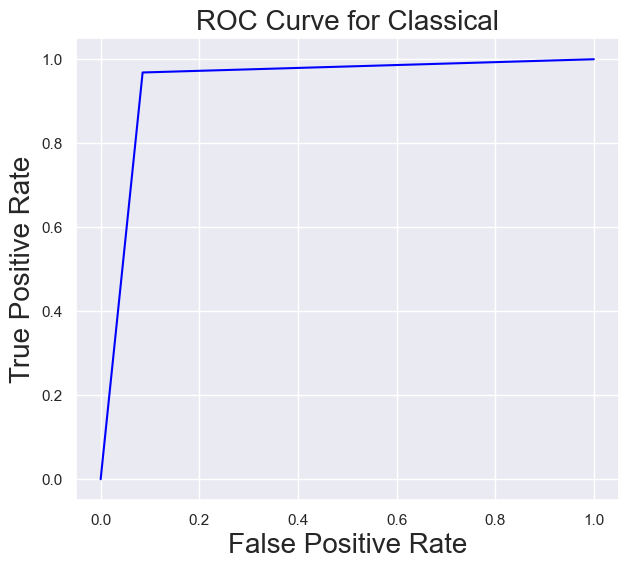

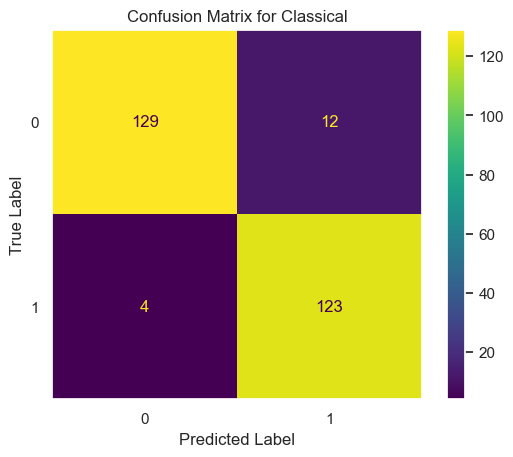

Accuracy of the model is: 0.940
AUC: 0.9416987770145754

Genre: 3

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 70.27027027027027% , Cost: 0.218
Epoch  2: accuracy 72.07207207207207% , Cost: 0.188
Epoch  3: accuracy 75.22522522522523% , Cost: 0.174
Epoch  4: accuracy 77.92792792792793% , Cost: 0.171
Epoch  5: accuracy 76.57657657657657% , Cost: 0.167
Epoch  6: accuracy 80.63063063063063% , Cost: 0.166
Epoch  7: accuracy 76.12612612612612% , Cost: 0.159
Epoch  8: accuracy 79.72972972972973% , Cost: 0.16
Epoch  9: accuracy 79.27927927927928% , Cost: 0.156
Epoch 10: accuracy 82.43243243243244% , Cost: 0.156
Epoch 11: accuracy 77.47747747747748% , Cost: 0.154
Epoch 12: accuracy 80.18018018018019% , Cost: 0.153
Epoch 13: accuracy 81.98198198198199% , Cost: 0.15
Epoch 14: accuracy 81.53153153153153% , Cost: 0.152
Epoch 15: accuracy 78.82882882882883% , Cost: 

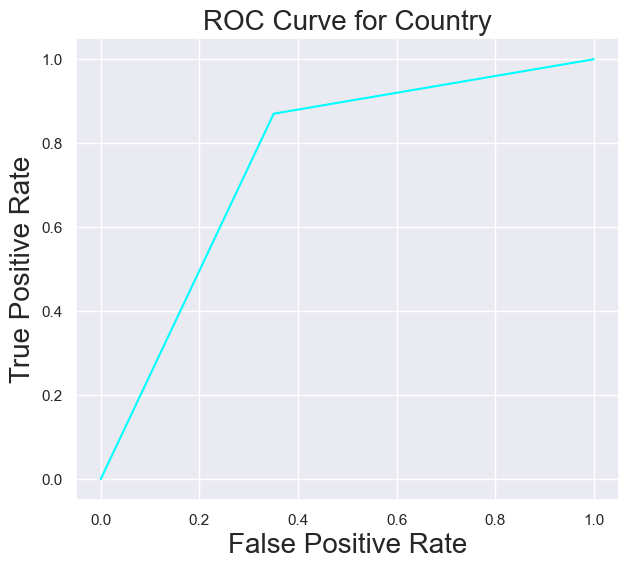

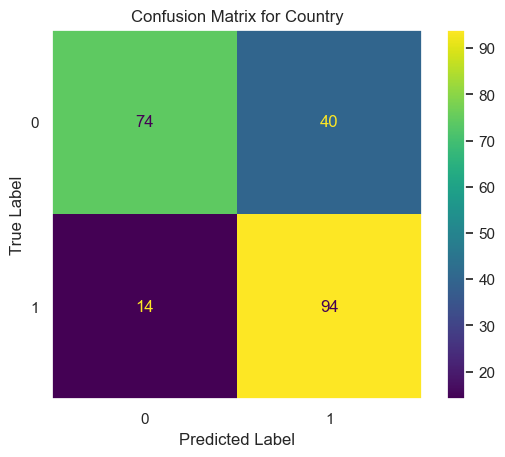

Accuracy of the model is: 0.757
AUC: 0.7597465886939572

Genre: 4

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 76.47058823529412% , Cost: 0.161
Epoch  2: accuracy 82.3529411764706% , Cost: 0.143
Epoch  3: accuracy 82.3529411764706% , Cost: 0.132
Epoch  4: accuracy 82.04334365325077% , Cost: 0.124
Epoch  5: accuracy 80.80495356037152% , Cost: 0.123
Epoch  6: accuracy 81.73374613003097% , Cost: 0.121
Epoch  7: accuracy 83.28173374613003% , Cost: 0.119
Epoch  8: accuracy 82.97213622291022% , Cost: 0.118
Epoch  9: accuracy 84.21052631578948% , Cost: 0.118
Epoch 10: accuracy 81.73374613003097% , Cost: 0.117
Epoch 11: accuracy 81.73374613003097% , Cost: 0.116
Epoch 12: accuracy 83.28173374613003% , Cost: 0.116
Epoch 13: accuracy 83.28173374613003% , Cost: 0.114
Epoch 14: accuracy 83.28173374613003% , Cost: 0.115
Epoch 15: accuracy 83.59133126934985% , Cost: 

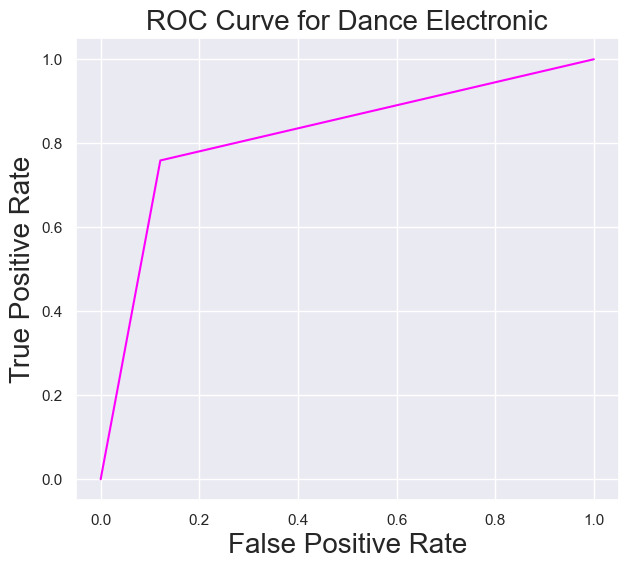

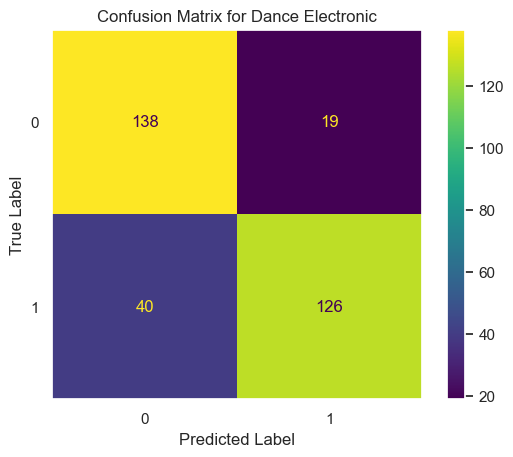

Accuracy of the model is: 0.817
AUC: 0.8190085181490293

Genre: 5

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 62.765957446808514% , Cost: 0.261
Epoch  2: accuracy 55.319148936170215% , Cost: 0.232
Epoch  3: accuracy 59.57446808510638% , Cost: 0.222
Epoch  4: accuracy 54.255319148936174% , Cost: 0.216
Epoch  5: accuracy 58.51063829787234% , Cost: 0.211
Epoch  6: accuracy 55.319148936170215% , Cost: 0.208
Epoch  7: accuracy 62.765957446808514% , Cost: 0.2
Epoch  8: accuracy 69.14893617021276% , Cost: 0.199
Epoch  9: accuracy 67.02127659574468% , Cost: 0.193
Epoch 10: accuracy 60.638297872340424% , Cost: 0.19
Epoch 11: accuracy 65.95744680851064% , Cost: 0.187
Epoch 12: accuracy 68.08510638297872% , Cost: 0.189
Epoch 13: accuracy 70.2127659574468% , Cost: 0.189
Epoch 14: accuracy 65.95744680851064% , Cost: 0.184
Epoch 15: accuracy 63.829787234042556% , C

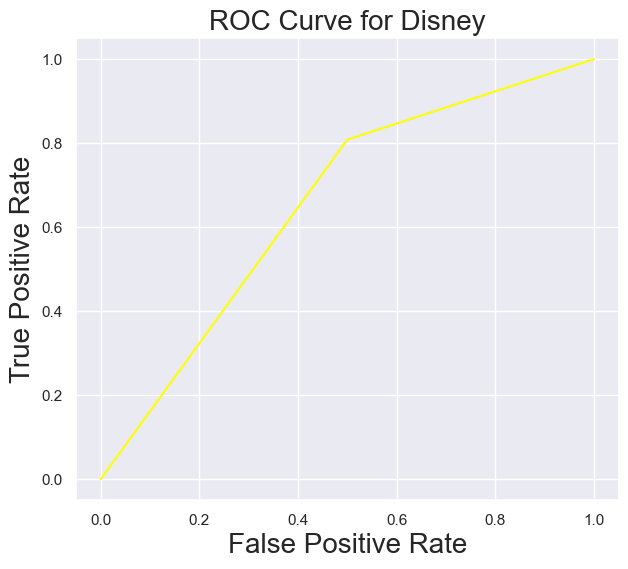

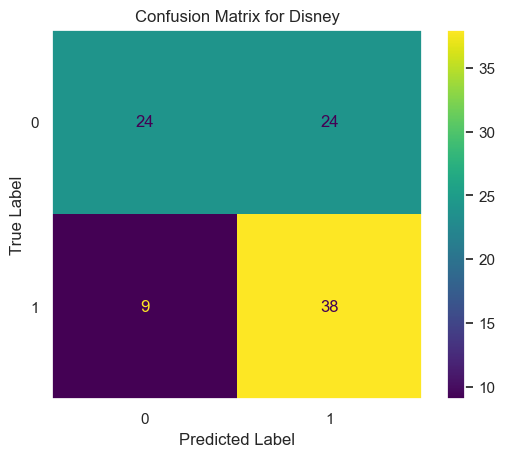

Accuracy of the model is: 0.653
AUC: 0.6542553191489362

Genre: 6

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 68.96551724137932% , Cost: 0.218
Epoch  2: accuracy 71.12068965517241% , Cost: 0.194
Epoch  3: accuracy 72.84482758620689% , Cost: 0.186
Epoch  4: accuracy 74.13793103448276% , Cost: 0.183
Epoch  5: accuracy 75.86206896551724% , Cost: 0.18
Epoch  6: accuracy 71.98275862068965% , Cost: 0.179
Epoch  7: accuracy 71.55172413793103% , Cost: 0.179
Epoch  8: accuracy 71.55172413793103% , Cost: 0.177
Epoch  9: accuracy 75.0% , Cost: 0.176
Epoch 10: accuracy 75.43103448275862% , Cost: 0.176
Epoch 11: accuracy 75.43103448275862% , Cost: 0.173
Epoch 12: accuracy 77.15517241379311% , Cost: 0.172
Epoch 13: accuracy 75.86206896551724% , Cost: 0.172
Epoch 14: accuracy 74.56896551724138% , Cost: 0.172
Epoch 15: accuracy 75.43103448275862% , Cost: 0.169
Epoch 

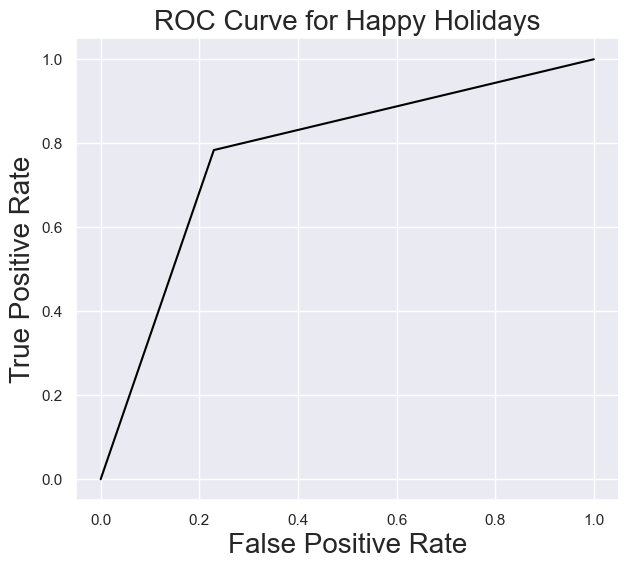

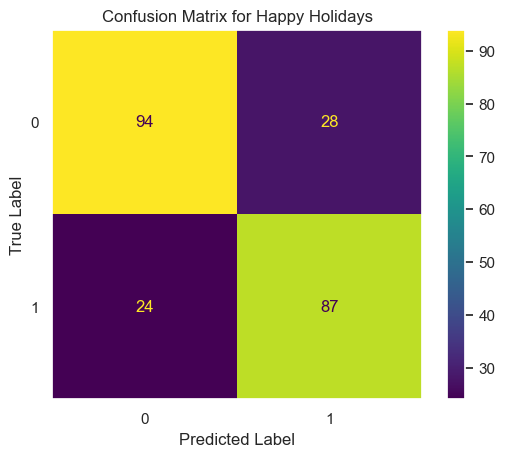

Accuracy of the model is: 0.777
AUC: 0.7771377935312361

Genre: 7

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 73.01038062283737% , Cost: 0.179
Epoch  2: accuracy 71.97231833910034% , Cost: 0.162
Epoch  3: accuracy 77.50865051903114% , Cost: 0.156
Epoch  4: accuracy 74.39446366782006% , Cost: 0.151
Epoch  5: accuracy 79.58477508650519% , Cost: 0.146
Epoch  6: accuracy 76.12456747404845% , Cost: 0.144
Epoch  7: accuracy 77.16262975778547% , Cost: 0.143
Epoch  8: accuracy 74.39446366782006% , Cost: 0.142
Epoch  9: accuracy 76.47058823529412% , Cost: 0.142
Epoch 10: accuracy 78.54671280276817% , Cost: 0.14
Epoch 11: accuracy 77.16262975778547% , Cost: 0.137
Epoch 12: accuracy 78.89273356401384% , Cost: 0.137
Epoch 13: accuracy 78.20069204152249% , Cost: 0.133
Epoch 14: accuracy 79.58477508650519% , Cost: 0.133
Epoch 15: accuracy 79.23875432525952% , Cost:

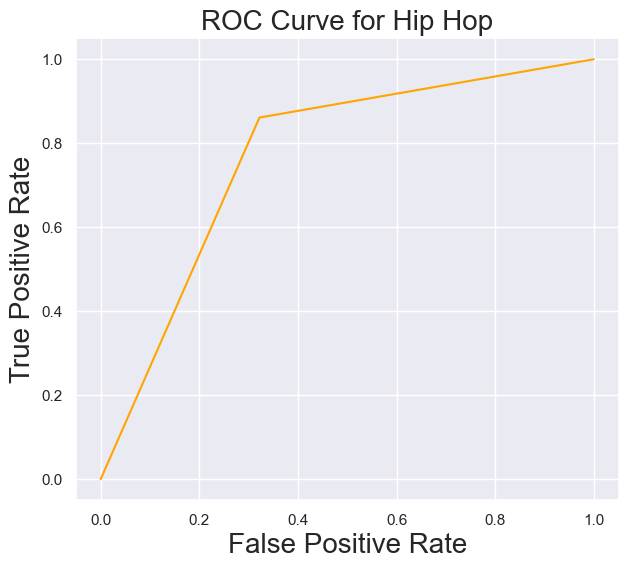

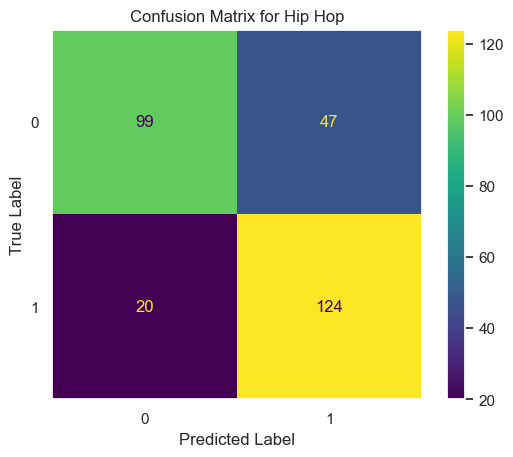

Accuracy of the model is: 0.769
AUC: 0.7695966514459666

Genre: 8

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 79.6437659033079% , Cost: 0.152
Epoch  2: accuracy 79.38931297709924% , Cost: 0.127
Epoch  3: accuracy 79.13486005089058% , Cost: 0.122
Epoch  4: accuracy 78.88040712468194% , Cost: 0.118
Epoch  5: accuracy 81.1704834605598% , Cost: 0.117
Epoch  6: accuracy 81.1704834605598% , Cost: 0.115
Epoch  7: accuracy 83.20610687022901% , Cost: 0.114
Epoch  8: accuracy 82.44274809160305% , Cost: 0.113
Epoch  9: accuracy 82.95165394402035% , Cost: 0.112
Epoch 10: accuracy 81.1704834605598% , Cost: 0.112
Epoch 11: accuracy 82.95165394402035% , Cost: 0.11
Epoch 12: accuracy 77.60814249363868% , Cost: 0.11
Epoch 13: accuracy 82.95165394402035% , Cost: 0.11
Epoch 14: accuracy 82.69720101781171% , Cost: 0.111
Epoch 15: accuracy 83.20610687022901% , Cost: 0.11


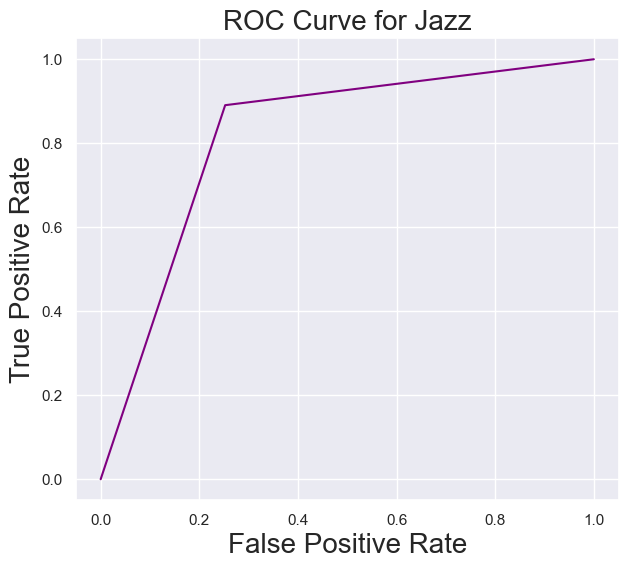

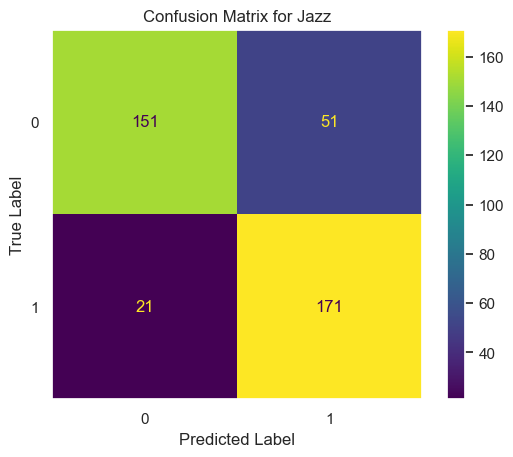

Accuracy of the model is: 0.817
AUC: 0.8190748762376238

Genre: 9

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 76.48456057007125% , Cost: 0.159
Epoch  2: accuracy 73.87173396674584% , Cost: 0.143
Epoch  3: accuracy 79.09738717339667% , Cost: 0.138
Epoch  4: accuracy 78.85985748218528% , Cost: 0.134
Epoch  5: accuracy 80.76009501187649% , Cost: 0.133
Epoch  6: accuracy 78.14726840855107% , Cost: 0.13
Epoch  7: accuracy 80.04750593824228% , Cost: 0.131
Epoch  8: accuracy 77.90973871733966% , Cost: 0.13
Epoch  9: accuracy 80.28503562945369% , Cost: 0.129
Epoch 10: accuracy 78.85985748218528% , Cost: 0.13
Epoch 11: accuracy 76.00950118764845% , Cost: 0.128
Epoch 12: accuracy 79.57244655581948% , Cost: 0.128
Epoch 13: accuracy 81.71021377672209% , Cost: 0.128
Epoch 14: accuracy 81.71021377672209% , Cost: 0.128
Epoch 15: accuracy 82.6603325415677% , Cost: 0.

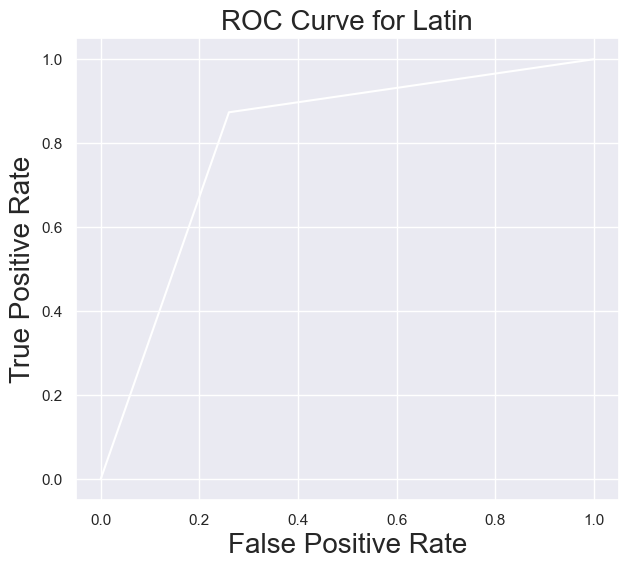

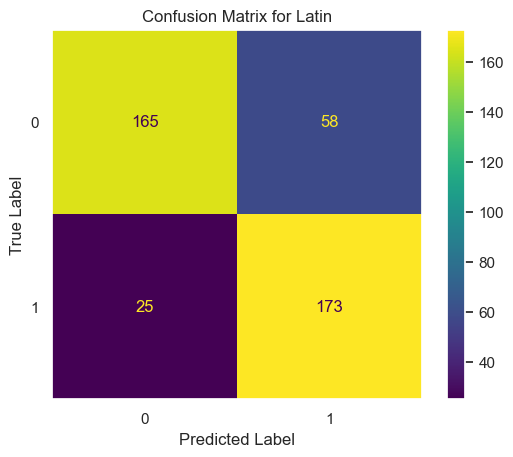

Accuracy of the model is: 0.803
AUC: 0.8068238438193596

Genre: 10

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 72.1030042918455% , Cost: 0.195
Epoch  2: accuracy 72.96137339055794% , Cost: 0.178
Epoch  3: accuracy 74.67811158798283% , Cost: 0.172
Epoch  4: accuracy 75.10729613733906% , Cost: 0.168
Epoch  5: accuracy 74.2489270386266% , Cost: 0.166
Epoch  6: accuracy 74.2489270386266% , Cost: 0.164
Epoch  7: accuracy 75.10729613733906% , Cost: 0.162
Epoch  8: accuracy 71.67381974248927% , Cost: 0.161
Epoch  9: accuracy 74.2489270386266% , Cost: 0.161
Epoch 10: accuracy 73.39055793991416% , Cost: 0.161
Epoch 11: accuracy 76.82403433476395% , Cost: 0.159
Epoch 12: accuracy 73.39055793991416% , Cost: 0.158
Epoch 13: accuracy 75.53648068669528% , Cost: 0.159
Epoch 14: accuracy 74.67811158798283% , Cost: 0.157
Epoch 15: accuracy 74.67811158798283% , Cost: 0

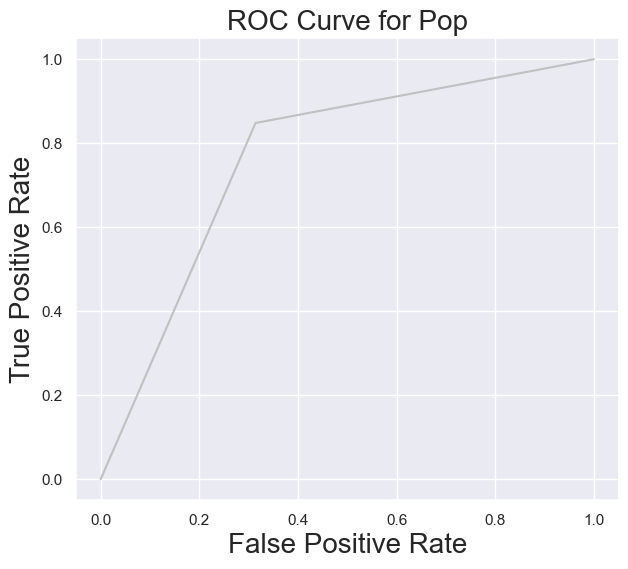

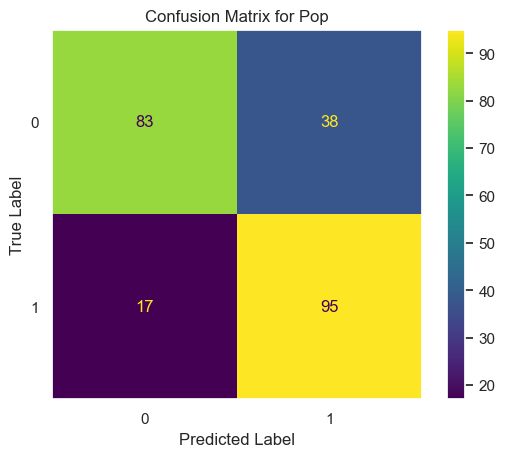

Accuracy of the model is: 0.764
AUC: 0.767082349468713

Genre: 11

Network layer 2
Shape of weights: (6, 8)
Shape of biases: (6, 1)

Network layer 3
Shape of weights: (2, 6)
Shape of biases: (2, 1)

Learning process started...

Epoch  1: accuracy 75.31645569620254% , Cost: 0.167
Epoch  2: accuracy 77.84810126582279% , Cost: 0.146
Epoch  3: accuracy 79.74683544303798% , Cost: 0.144
Epoch  4: accuracy 77.21518987341773% , Cost: 0.143
Epoch  5: accuracy 77.84810126582279% , Cost: 0.142
Epoch  6: accuracy 82.9113924050633% , Cost: 0.14
Epoch  7: accuracy 80.37974683544304% , Cost: 0.14
Epoch  8: accuracy 79.74683544303798% , Cost: 0.139
Epoch  9: accuracy 82.27848101265823% , Cost: 0.138
Epoch 10: accuracy 84.17721518987342% , Cost: 0.138
Epoch 11: accuracy 79.11392405063292% , Cost: 0.137
Epoch 12: accuracy 84.17721518987342% , Cost: 0.135
Epoch 13: accuracy 79.74683544303798% , Cost: 0.136
Epoch 14: accuracy 84.81012658227849% , Cost: 0.135
Epoch 15: accuracy 85.44303797468355% , Cost: 0

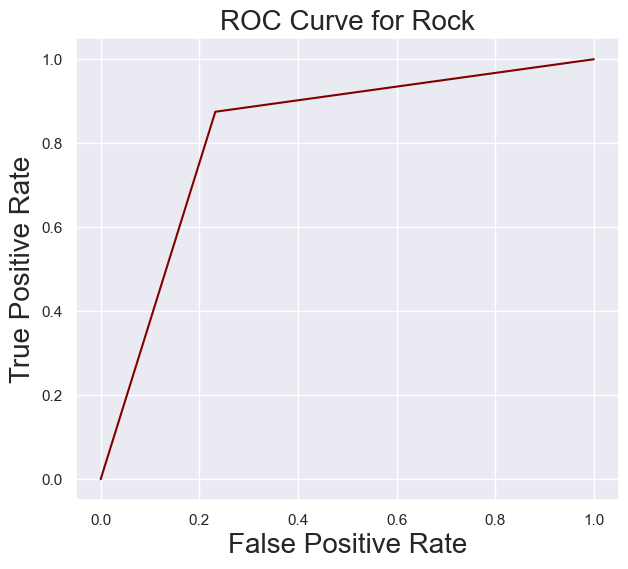

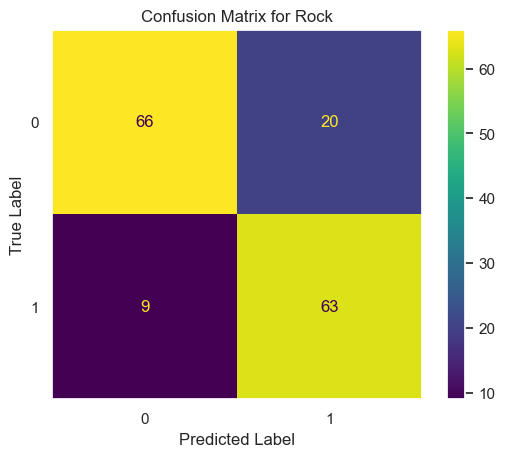

Accuracy of the model is: 0.816
AUC: 0.8212209302325582


In [449]:
#Loop Through Each Genres and Run One-vs-All Through the Neural Network 
#Calculates Accuracy, ROC Curve, AUC
colors = ['red','green','blue','cyan','magenta','yellow','black','orange','purple','white','silver','maroon']
labels = ['Anime', 'Broadway', 'Classical', 'Country', 'Dance Electronic', 'Disney', 'Happy Holidays', 'Hip Hop', 'Jazz', 'Latin', 'Pop','Rock']
TP = []
FN = []
FP = []
TN = []
for a, b, c, d, e in zip(genres, rest, samples, colors, labels):
    #Load Data
    train, test, validate = binary_classifier(a,b,c)
    
    #Train and Test Neural Network
    #8 Input Features, 6 Neurons in Hidden Layer, 2 Output Labels
    training_data, validation_data, test_data = load_data_wrapper(train,test,validate)
    nn = init_network([8, 6, 2])
    
    print("\nGenre: "+str(a))

    for l in range(0, nn.num_layers - 1):
        print('\nNetwork layer {0}'.format(l + 2))
        print_shape('weights', nn.weights[l])
        print_shape('biases', nn.biases[l])
    
    #Hyper Parameters
    epochs = 30
    mini_batch_size = 10
    learning_rate = 3.0
    
    #Learning Process
    print('\nLearning process started...\n')
    time_start = time()
    learn(nn, training_data, epochs, mini_batch_size, learning_rate, validation_data)
    time_end = time()
    time_elapsed = time_end - time_start
    print('\nLearning process complete in {0} seconds ({1} seconds per epoch)!\n'.format(f'{time_elapsed:.0f}', f'{time_elapsed / epochs:.1f}'))

    #Use Held Out Test Data to Determine Accuracy
    print('Validation (with yet unseen data): accuracy {0}%'.format(100.0 * evaluate(nn, test_data) / len(test_data)))
    
    #Get Predicted and True Values
    test_results = [(np.argmax(feedforward(nn, x)), y) for (x, y) in test_data]
    y_pred = []
    y_true = []
    for i in range(len(test_results)):
        y_pred.append(test_results[i][0])
        y_true.append(test_results[i][1])

    #ROC Curves
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    fig = plt.figure(figsize = (7,6)) 
    plt.plot(fpr, tpr, color=d)
    plt.xlabel('False Positive Rate', fontsize=20)
    plt.ylabel('True Positive Rate', fontsize=20)
    plt.title('ROC Curve for '+str(e), fontsize=20)
    plt.show()
    
    #Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    TP.append(conf_matrix[1][1])
    FN.append(conf_matrix[1][0])
    FP.append(conf_matrix[0][1])
    TN.append(conf_matrix[0][0])
    disp=ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1])
    disp.plot()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for '+str(e))
    plt.grid()
    plt.show()
    print("Accuracy of the model is: %.3f" % accuracy_score(y_pred, y_true))
    auc = roc_auc_score(y_true, y_pred)
    print("AUC: "+str(auc))
    
    

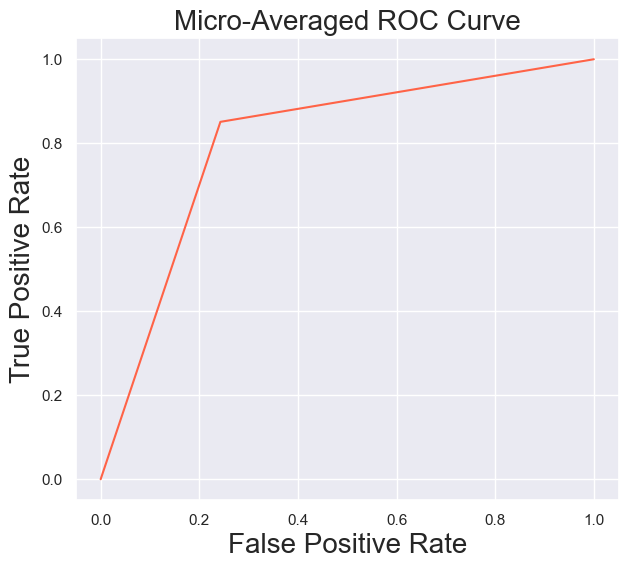

In [450]:
#Micro Averaged ROC
total_instances_1 = sum(TP) + sum(FN)
total_instances_2 = sum(FP) + sum(TN)

#Micro-averaged TPR and FPR
micro_TPR = sum(TP) / total_instances_1
micro_FPR = sum(FP) / total_instances_2

micro_TPR = [0, micro_TPR, 1]
micro_FPR = [0, micro_FPR, 1]
thresholds = [2, 1, 0]

#Plot the ROC Curve
fig = plt.figure(figsize = (7,6)) 
plt.plot(micro_FPR, micro_TPR, color='tomato')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('Micro-Averaged ROC Curve', fontsize=20)
plt.show()



# Random Forest Classifier

Use Random Forest Classification to validate results.

In [453]:
#Load and Transform Data
neural_data = neural_df.copy()
Y = neural_data['Genre'].tolist()
neural_data = neural_data.drop(['Genre'], axis=1)
X = neural_data.to_numpy() 
y = np.array(Y)

#80/20 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=17669368)


In [454]:
#Random Forest Classifier Optimized Using Grid Search
#Takes an Hour to Run

#Parameters 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 3)]
max_features = [round(x,2) for x in np.linspace(start = 0.3, stop = 1.0, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(start = 300, stop = 600, num = 3)]
bootstrap = [True, False]

#Create Parameter Grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#Set the Estimator and Grid Search Object and Fit to Training Data
random_forest=RandomForestClassifier()
rf_grid = GridSearchCV(random_forest, param_grid, cv=5, scoring="accuracy", refit=True)
rf_grid.fit(X_train, y_train)

#Get Best Parameters and Best Score
print("Best parameters:", rf_grid.best_params_)
print("Best score: {:.2f}".format(rf_grid.best_score_))

#Get Accuracy on Unseen Data
accuracy = rf_grid.score(X_test, y_test)
print(accuracy)
#Get Accuracy on Unseen Data
y_pred = rf_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))


Best parameters: {'bootstrap': False, 'max_features': 0.3, 'min_samples_leaf': 300, 'n_estimators': 55}
Best score: 0.46
0.4709634105404498
Accuracy: 0.4710


# Boosting

Use boosting to validate results.

In [451]:
#Load and Transform Data
neural_data = neural_df.copy()
Y = neural_data['Genre'].tolist()
neural_data = neural_data.drop(['Genre'], axis=1)
X = neural_data.to_numpy() 
y = np.array(Y) 

#80/20 Train/Test Split and Standardize Data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=17669368)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [452]:
#Gradient Boosting Classifier Optimized Using Grid Search
#**Takes At Least 45Min-1Hr to Run

#Parameters 
n_estimators = [100, 200, 300]
learning_rate = [0.1, 0.2, 0.3]
max_depth = [1, 2, 3]

#Create Parameter Grid
param_grid = {
    'n_estimators': n_estimators,
    'learning_rate': learning_rate,
    'max_depth': max_depth}

#Set the Estimator and Grid Search Object and Fit to Training Data
gradient_boosting = GradientBoostingClassifier()
gb_grid = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', refit=True)
gb_grid.fit(X_train, y_train)

#Get Best Parameters and Best Score
print("Best parameters:", gb_grid.best_params_)
print("Best score: {:.2f}".format(gb_grid.best_score_))

#Get Accuracy on Unseen Data
y_pred = gb_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))


Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 300}
Best score: 0.56
Accuracy: 0.5465


# Support Vector Machine

Use SVM to validate results.

In [455]:
#Load and Transform Data
neural_data = neural_df.copy()
Y = neural_data['Genre'].tolist()
neural_data = neural_data.drop(['Genre'], axis=1)
X = neural_data.to_numpy() 
y = np.array(Y) 

#80/20 Train/Test Split and Standardize Data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=17669368)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [456]:
#Support Vector Machine Classifier Optimized Using GridSearch
#**Takes a Few Hours to Run

#Parameters 
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [0.1, 1, 10, 100]
gamma = ['scale', 'auto']
degree = [2, 3, 4]

#Create Parameter Grid
param_grid = {
    'kernel': kernel,
    'C': C,
    'gamma': gamma,
    'degree': degree}

#Set the Estimator and Grid Search Object and Fit to Training Data
support_vector = SVC()
SVC_grid = GridSearchCV(support_vector, param_grid, cv=5, scoring='accuracy', refit=True)
SVC_grid.fit(X_train, y_train)

#Get Best Parameters and Best Score
print("Best parameters:", SVC_grid.best_params_)
print("Best score: {:.2f}".format(SVC_grid.best_score_))

#Get Accuracy on Unseen Data
y_pred = SVC_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.4f}".format(accuracy))

Best parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best score: 0.56
Accuracy: 0.5559
